**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats

**Get the Relevant Data**

In [2]:
# useful directories
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Final Radio Astrophysics'

dir_data = base_dir + '\\Data\\12-6-2021'
dir_plot= base_dir + '\\Paper and Presentation'

In [3]:
os.chdir(dir_data)

In [4]:
# get the 4 data files
f2 = open('illiachtida2.rad', 'r')

lines2 = list(f2.readlines())

Get the Longitudes, Spectra, vlsr

In [5]:
# illiachtida 2
longs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
spectra2 = []
vlsrs2 = []

for line in lines2[11:][::7]:
    text = line.split()
    
    # get the temperature readings
    freqs = text[text.index('148') + 1:text.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    spectra2.append(nums)
    
    # get the vlsr
    vlsrs2.append(float(text[text.index('vlsr')+1]))

**Plot the Spectra as functions of Frequency**

In [6]:
# plot parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')

In [7]:
# set up the frequency bins
bins = [1419.84 + i*0.00781250 for i in range(148)]

Plot the Spectra for G0-G90 and do linear fits

In [8]:
# linear function to fit to
def linear_func(a, b, x):
    return a*x + b

In [9]:
# fit function
def linfit(bins, freqs, errs, a, b):
    popt, pcov = curve_fit(linear_func, bins, freqs, sigma=errs, p0 = [a, b],
                       absolute_sigma = True)
    return popt, pcov

In [10]:
# chisq function
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

Illiachtida1, 0-90

In [20]:
# get rid of outliers
mask = (np.array(spectra2[0])>200)
spec0_1 = np.array(spectra2[0])[mask]
bins0_1 = np.array(bins)[mask]

In [21]:
# fit G0_1
popt0_1, pcov0_1 = linfit(bins0_1, spec0_1, np.sqrt(spec0_1/20), a=0.5, b=195)

In [22]:
# chisq0_1
chi0_1 = chisq(linear_func, popt0_1, bins0_1, spec0_1, np.sqrt(spec0_1/20))

In [23]:
# fit params and errors
b0_1 = popt0_1[0]
a0_1 = popt0_1[1]
b0_1err, a0_1err = np.sqrt(np.diag(pcov0_1))

In [24]:
chi0_1

8.871975564483595

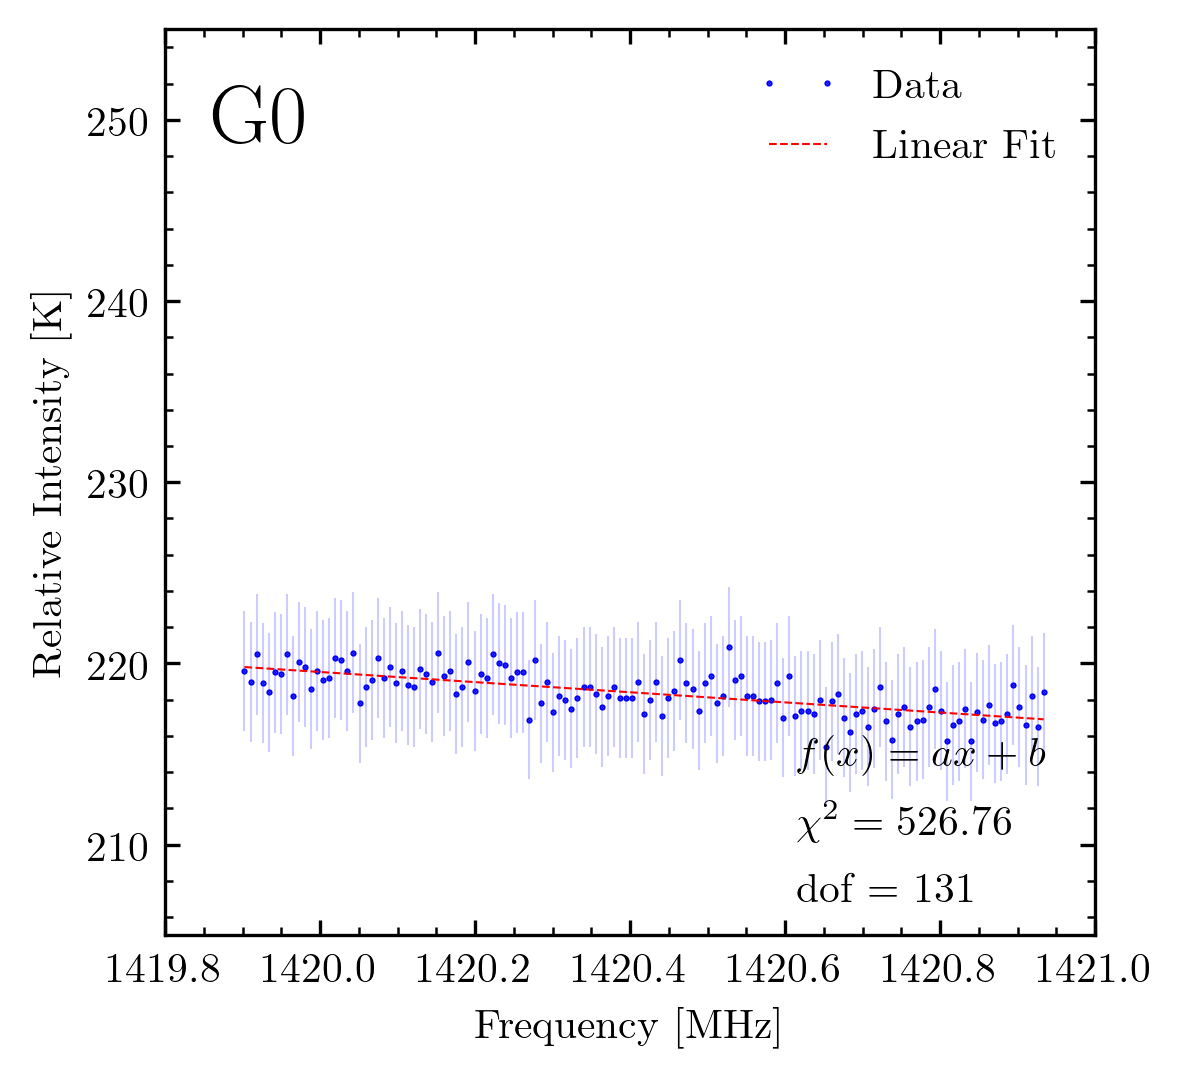

In [25]:
# G0_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,255), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins0_1, spec0_1, yerr=np.sqrt(spec0_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins0_1, spec0_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins0_1[0],bins0_1[-1], 100)
ax.plot(x, linear_func(x, *popt0_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G0')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=526.76$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_0_2.png')

In [28]:
# get rid of outliers
mask = (np.array(spectra2[1])>200)
spec5_1 = np.array(spectra2[1])[mask]
bins5_1 = np.array(bins)[mask]

In [29]:
# fit G5_1
popt5_1, pcov5_1 = linfit(bins5_1, spec5_1, np.sqrt(spec5_1/20), a=0.5, b=195)

# chisq5_1
chi5_1 = chisq(linear_func, popt5_1, bins5_1, spec5_1, np.sqrt(spec5_1/20))

# fit params and errors
b5_1 = popt5_1[0]
a5_1 = popt5_1[1]
b5_1err, a5_1err = np.sqrt(np.diag(pcov5_1))

In [30]:
chi5_1

5.703614387855999

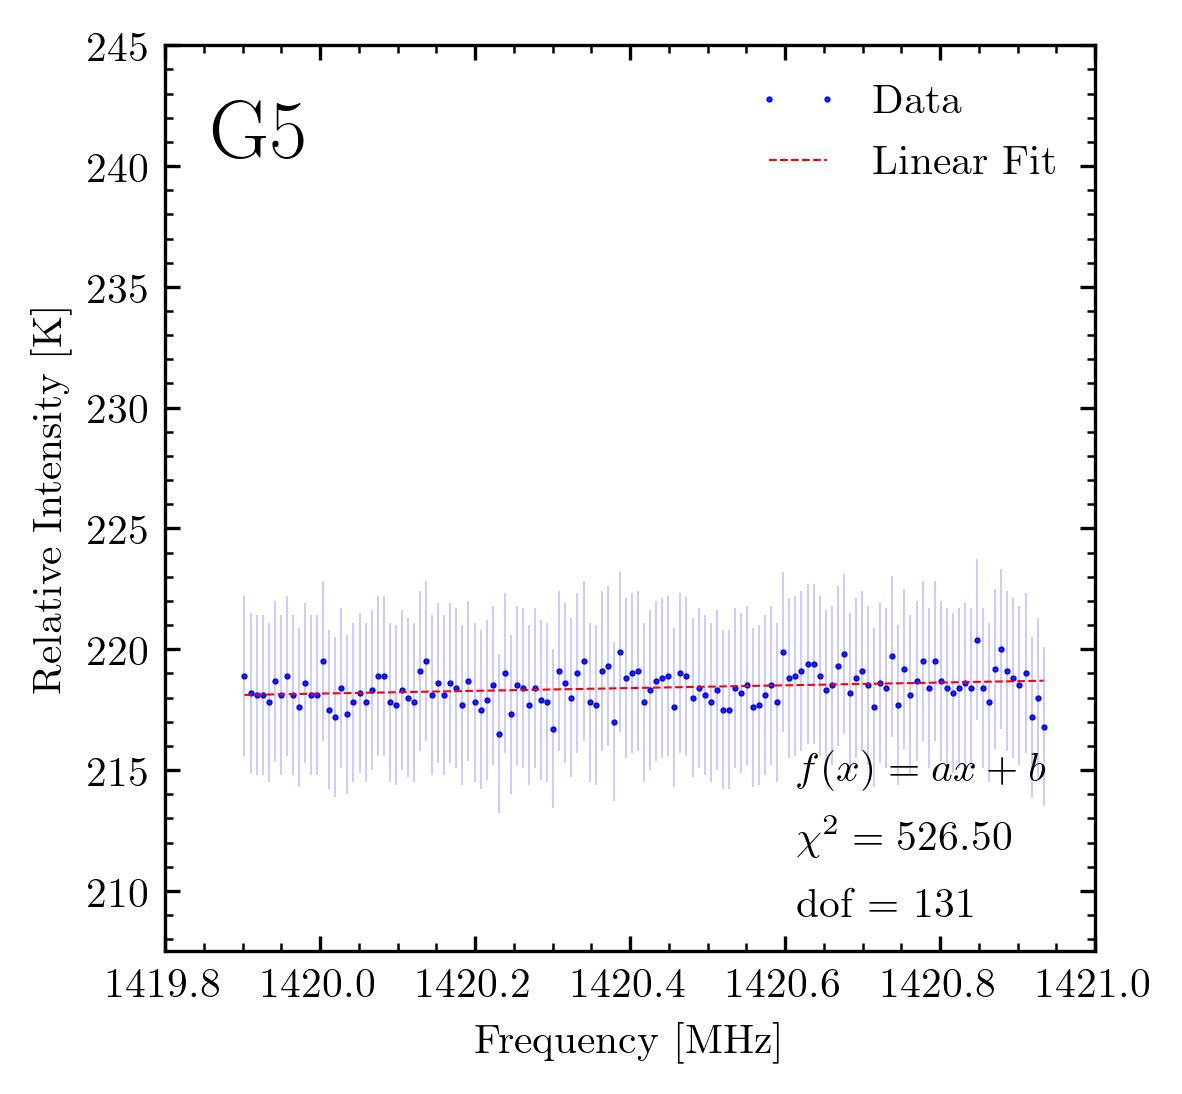

In [32]:
# G5_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(207.5,245), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins5_1, spec5_1, yerr=np.sqrt(spec5_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins5_1, spec5_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins5_1[0],bins5_1[-1], 100)
ax.plot(x, linear_func(x, *popt5_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G5')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=526.50$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_5_2.png')

In [35]:
# get rid of outliers
mask = (np.array(spectra2[2])>200)
spec10_1 = np.array(spectra2[2])[mask]
bins10_1 = np.array(bins)[mask]

In [36]:
# fit G10_1
popt10_1, pcov10_1 = linfit(bins10_1, spec10_1, np.sqrt(spec10_1/20), a=0.5, b=195)

# chisq10_1
chi10_1 = chisq(linear_func, popt10_1, bins10_1, spec10_1, np.sqrt(spec10_1/20))

# fit params and errors
b10_1 = popt10_1[0]
a10_1 = popt10_1[1]
b10_1err, a10_1err = np.sqrt(np.diag(pcov10_1))

In [37]:
chi10_1

7.714495841122491

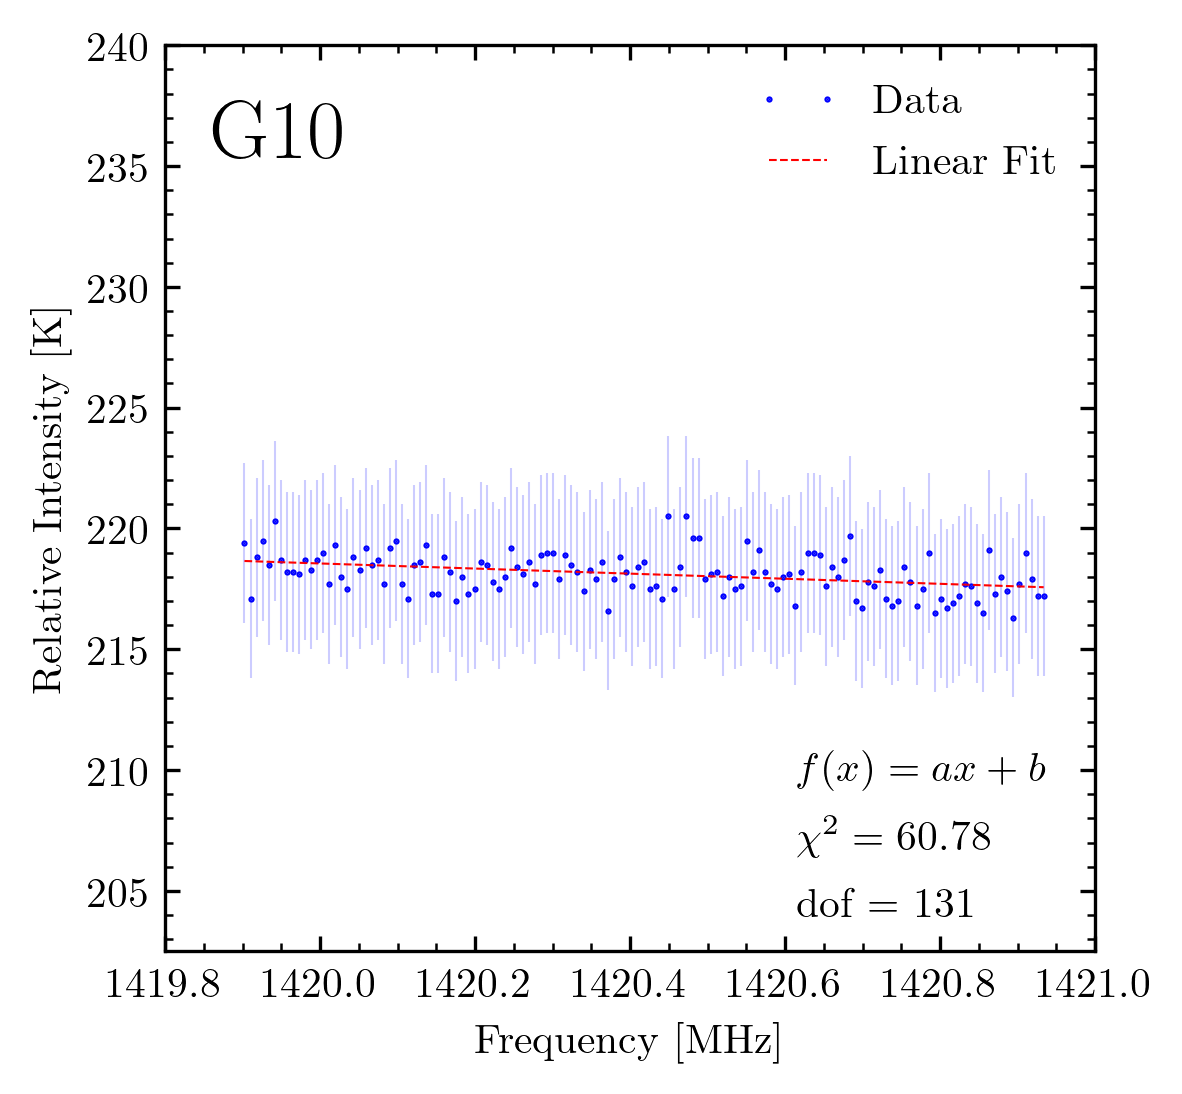

In [40]:
# G10_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(202.5,240), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins10_1, spec10_1, yerr=np.sqrt(spec10_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins10_1, spec10_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins10_1[0],bins10_1[-1], 100)
ax.plot(x, linear_func(x, *popt10_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G10')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=60.78$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_10_2.png')

In [42]:
# get rid of outliers
mask = (np.array(spectra2[3])>200)
spec15_1 = np.array(spectra2[3])[mask]
bins15_1 = np.array(bins)[mask]

In [43]:
# fit G15_1
popt15_1, pcov15_1 = linfit(bins15_1, spec15_1, np.sqrt(spec15_1/20), a=0.5, b=195)

# chisq15_1
chi15_1 = chisq(linear_func, popt15_1, bins15_1, spec15_1, np.sqrt(spec15_1/20))

# fit params and errors
b15_1 = popt15_1[0]
a15_1 = popt15_1[1]
b15_1err, a15_1err = np.sqrt(np.diag(pcov15_1))

In [44]:
chi15_1

6.016741503877972

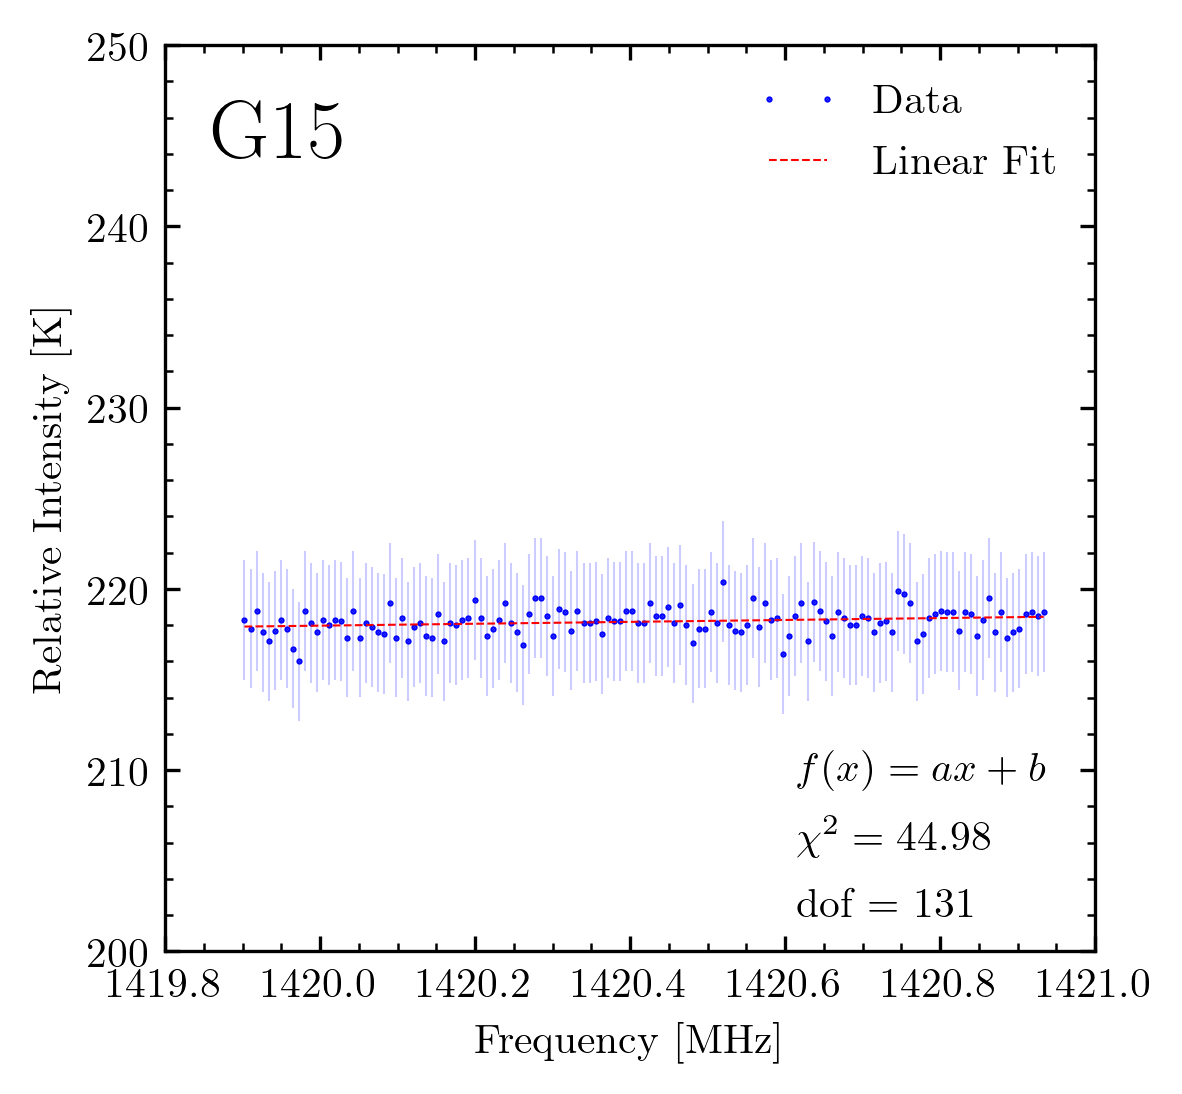

In [46]:
# G15_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(200,250), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins15_1, spec15_1, yerr=np.sqrt(spec15_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins15_1, spec15_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins15_1[0],bins15_1[-1], 100)
ax.plot(x, linear_func(x, *popt15_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G15')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=44.98$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_15_1.png')

In [48]:
# get rid of outliers
mask = (np.array(spectra2[4])>200)
spec20_1 = np.array(spectra2[4])[mask]
bins20_1 = np.array(bins)[mask]

In [49]:
# fit G20_1
popt20_1, pcov20_1 = linfit(bins20_1, spec20_1, np.sqrt(spec20_1/20), a=0.5, b=195)

# chisq20_1
chi20_1 = chisq(linear_func, popt20_1, bins20_1, spec20_1, np.sqrt(spec20_1/20))

# fit params and errors
b20_1 = popt20_1[0]
a20_1 = popt20_1[1]
b20_1err, a20_1err = np.sqrt(np.diag(pcov20_1))

In [50]:
chi20_1

6.685619706497032

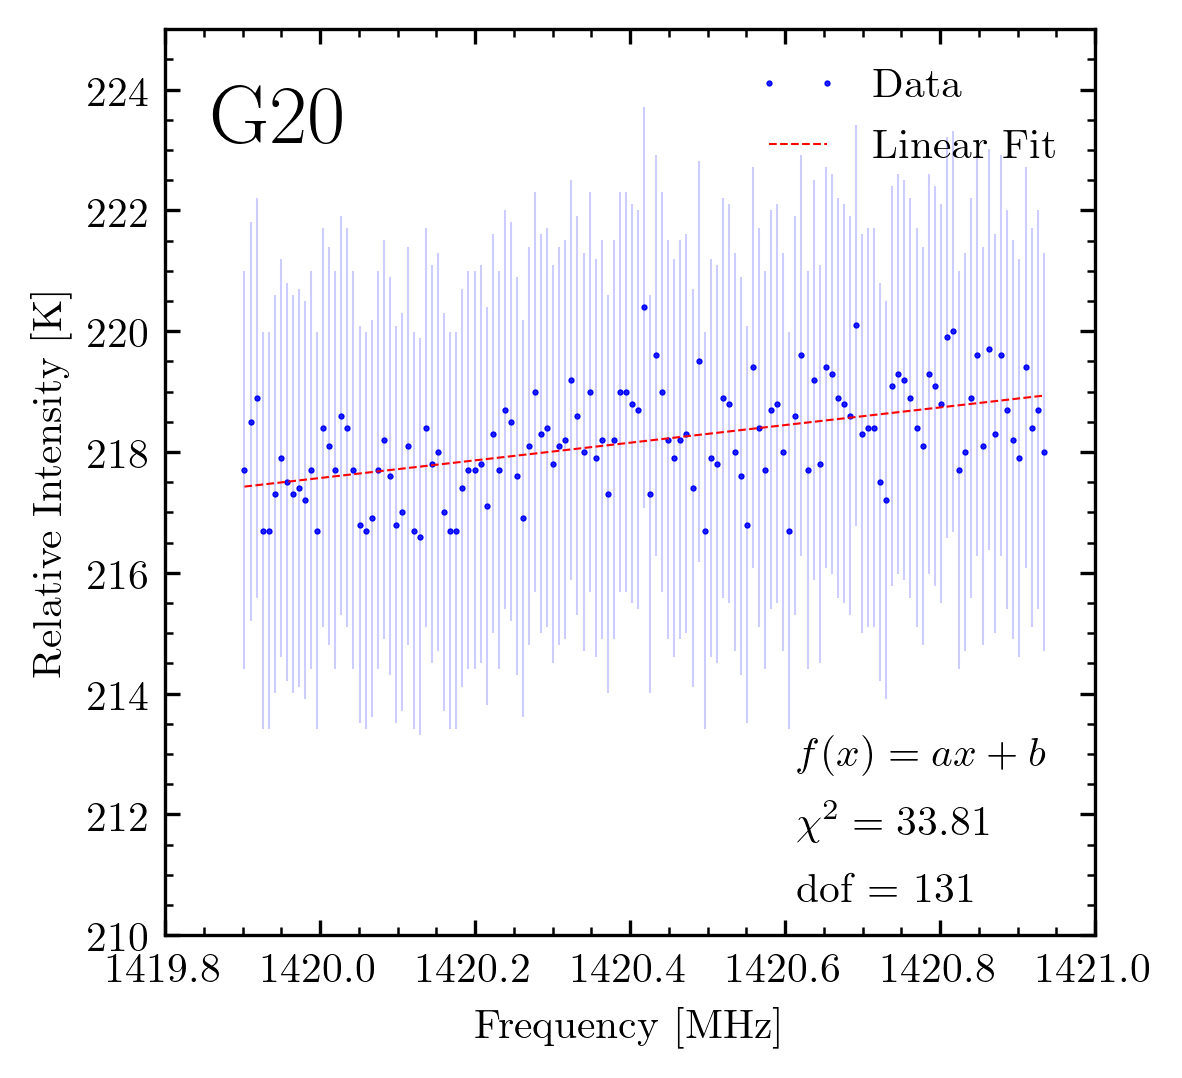

In [53]:
# G20_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins20_1, spec20_1, yerr=np.sqrt(spec20_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins20_1, spec20_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins20_1[0],bins20_1[-1], 100)
ax.plot(x, linear_func(x, *popt20_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G20')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=33.81$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_20_2.png')

In [55]:
# get rid of outliers
mask = (np.array(spectra2[5])>200)
spec25_1 = np.array(spectra2[5])[mask]
bins25_1 = np.array(bins)[mask]

In [56]:
# fit G25_1
popt25_1, pcov25_1 = linfit(bins25_1, spec25_1, np.sqrt(spec25_1/20), a=0.5, b=195)

# chisq25_1
chi25_1 = chisq(linear_func, popt25_1, bins25_1, spec25_1, np.sqrt(spec25_1/20))

# fit params and errors
b25_1 = popt25_1[0]
a25_1 = popt25_1[1]
b25_1err, a25_1err = np.sqrt(np.diag(pcov25_1))

In [57]:
chi25_1

7.010166558987024

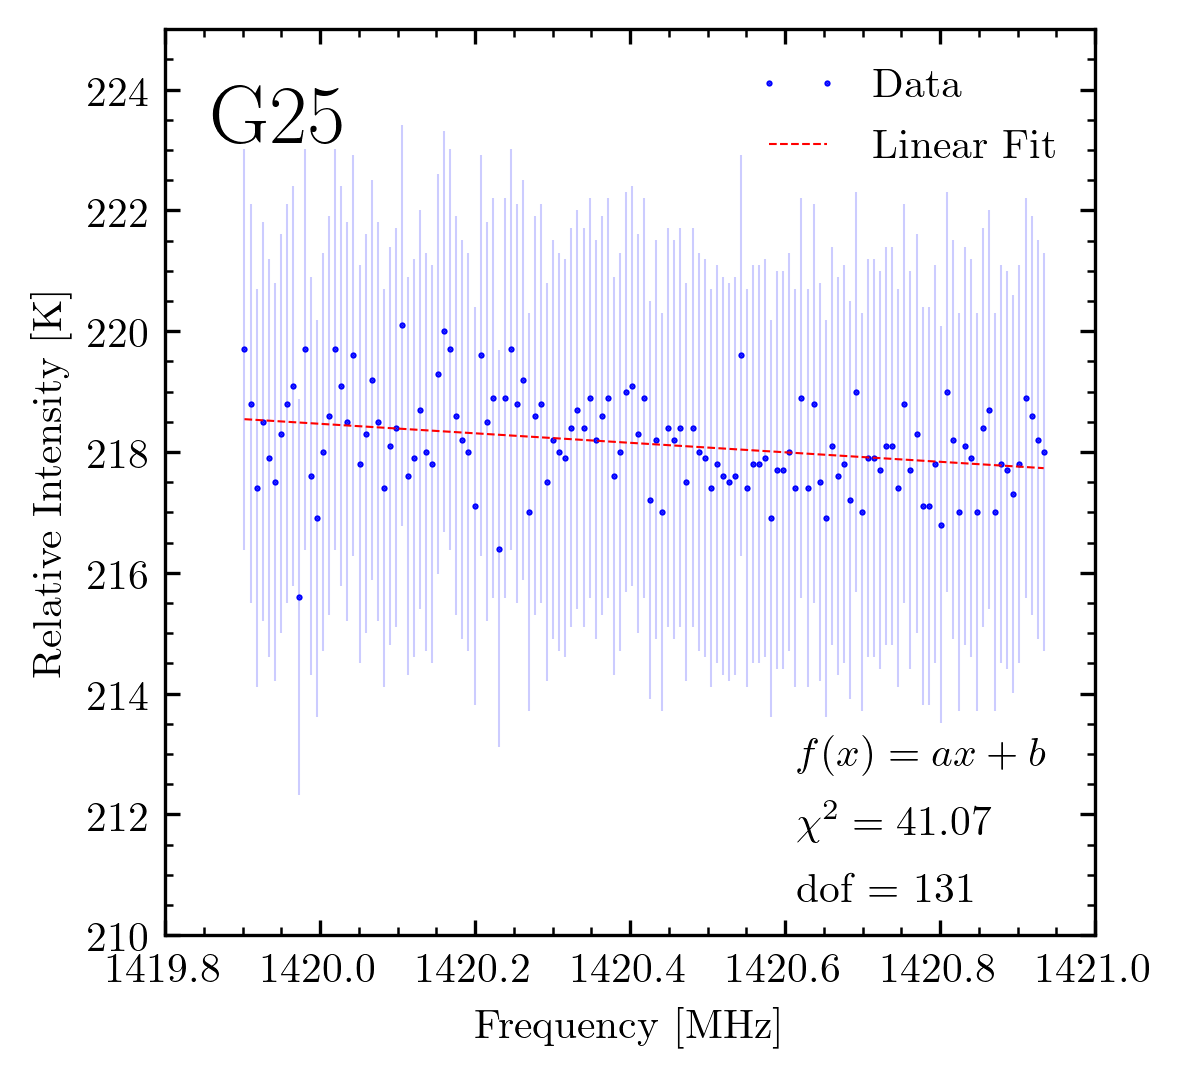

In [59]:
# G25_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins25_1, spec25_1, yerr=np.sqrt(spec25_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins25_1, spec25_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins25_1[0],bins25_1[-1], 100)
ax.plot(x, linear_func(x, *popt25_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G25')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=41.07$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_25_2.png')

In [62]:
# get rid of outliers
mask = (np.array(spectra2[6])>200)
spec30_1 = np.array(spectra2[6])[mask]
bins30_1 = np.array(bins)[mask]

In [63]:
# fit G30_1
popt30_1, pcov30_1 = linfit(bins30_1, spec30_1, np.sqrt(spec30_1/20), a=0.5, b=195)

# chisq30_1
chi30_1 = chisq(linear_func, popt30_1, bins30_1, spec30_1, np.sqrt(spec30_1/20))

# fit params and errors
b30_1 = popt30_1[0]
a30_1 = popt30_1[1]
b30_1err, a30_1err = np.sqrt(np.diag(pcov30_1))

In [64]:
chi30_1

6.232107573200577

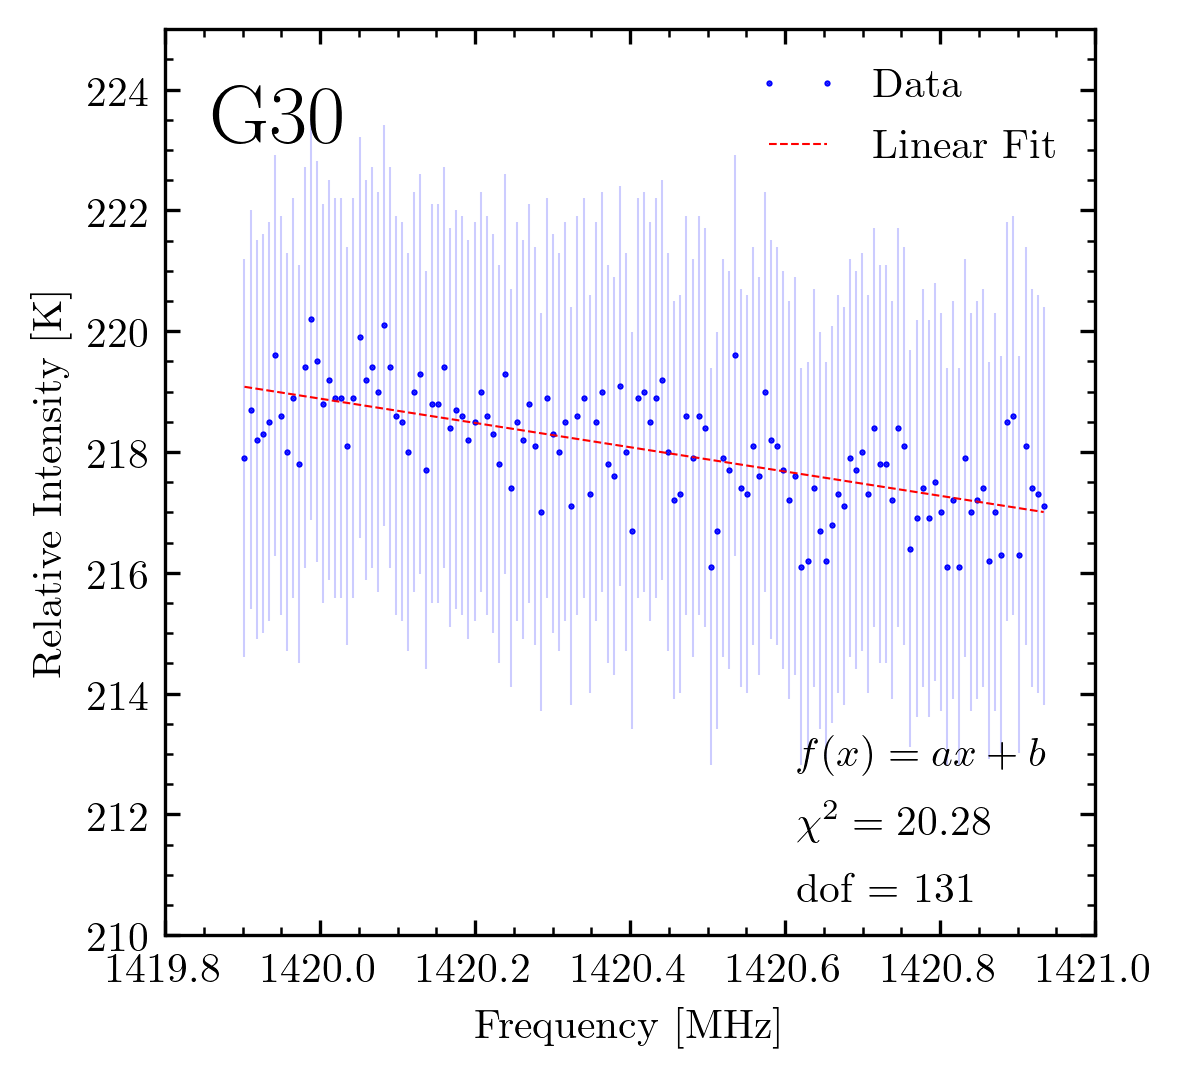

In [67]:
# G30_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins30_1, spec30_1, yerr=np.sqrt(spec30_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins30_1, spec30_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins30_1[0],bins30_1[-1], 100)
ax.plot(x, linear_func(x, *popt30_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G30')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=20.28$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_30_2.png')

In [69]:
# get rid of outliers
mask = (np.array(spectra2[7])>200)
spec35_1 = np.array(spectra2[7])[mask]
bins35_1 = np.array(bins)[mask]

In [70]:
# fit G35_1
popt35_1, pcov35_1 = linfit(bins35_1, spec35_1, np.sqrt(spec35_1/20), a=0.5, b=195)

# chisq35_1
chi35_1 = chisq(linear_func, popt35_1, bins35_1, spec35_1, np.sqrt(spec35_1/20))

# fit params and errors
b35_1 = popt35_1[0]
a35_1 = popt35_1[1]
b35_1err, a35_1err = np.sqrt(np.diag(pcov35_1))

In [71]:
chi35_1

8.565977305704946

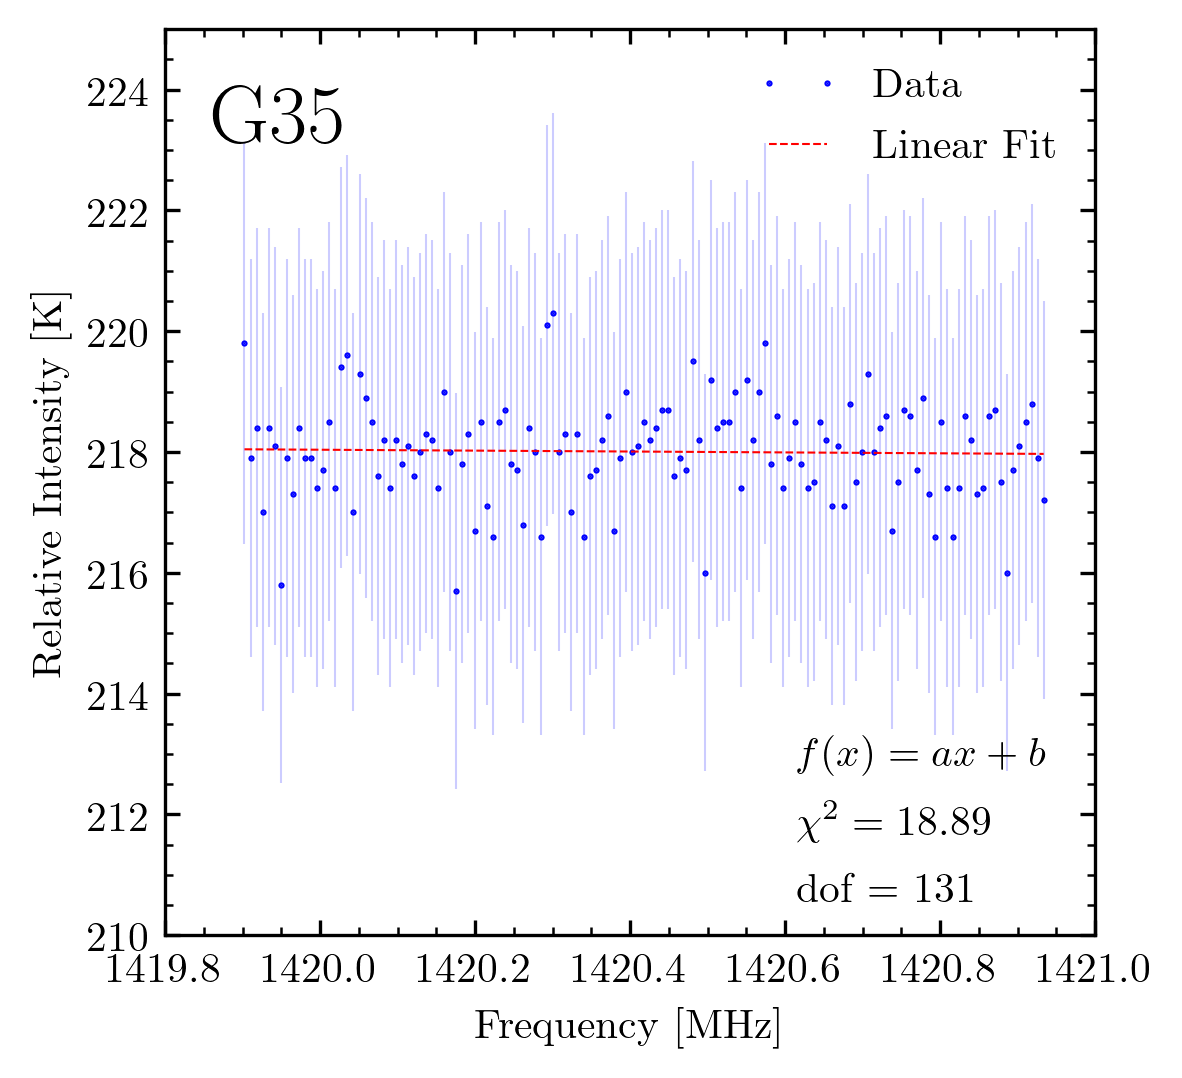

In [73]:
# G35_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins35_1, spec35_1, yerr=np.sqrt(spec35_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins35_1, spec35_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins35_1[0],bins35_1[-1], 100)
ax.plot(x, linear_func(x, *popt35_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G35')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=18.89$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_35_2.png')

In [75]:
# get rid of outliers
mask = (np.array(spectra2[8])>200)
spec40_1 = np.array(spectra2[8])[mask]
bins40_1 = np.array(bins)[mask]

In [76]:
# fit G40_1
popt40_1, pcov40_1 = linfit(bins40_1, spec40_1, np.sqrt(spec40_1/20), a=0.5, b=195)

# chisq40_1
chi40_1 = chisq(linear_func, popt40_1, bins40_1, spec40_1, np.sqrt(spec40_1/20))

# fit params and errors
b40_1 = popt40_1[0]
a40_1 = popt40_1[1]
b40_1err, a40_1err = np.sqrt(np.diag(pcov40_1))

In [77]:
chi40_1

8.56660454222293

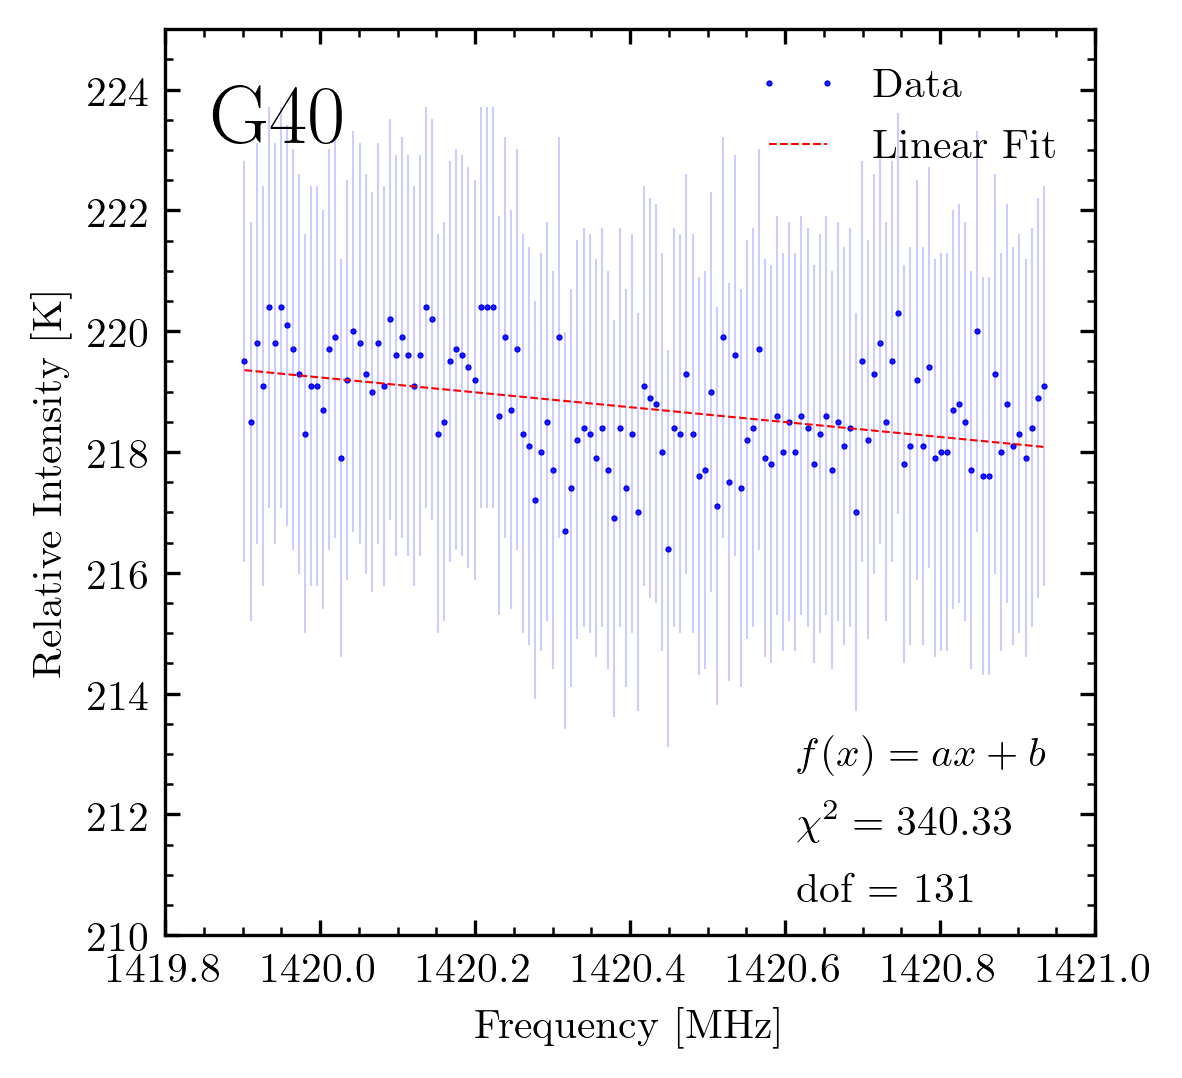

In [80]:
# G40_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins40_1, spec40_1, yerr=np.sqrt(spec40_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins40_1, spec40_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins40_1[0],bins40_1[-1], 100)
ax.plot(x, linear_func(x, *popt40_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G40')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=340.33$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_40_2.png')

In [82]:
# get rid of outliers
mask = (np.array(spectra2[9])>200)
spec45_1 = np.array(spectra2[9])[mask]
bins45_1 = np.array(bins)[mask]

In [83]:
# fit G45_1
popt45_1, pcov45_1 = linfit(bins45_1, spec45_1, np.sqrt(spec45_1/20), a=0.5, b=195)

# chisq45_1
chi45_1 = chisq(linear_func, popt45_1, bins45_1, spec45_1, np.sqrt(spec45_1/20))

# fit params and errors
b45_1 = popt45_1[0]
a45_1 = popt45_1[1]
b45_1err, a45_1err = np.sqrt(np.diag(pcov45_1))

In [84]:
chi45_1

6.554805117047303

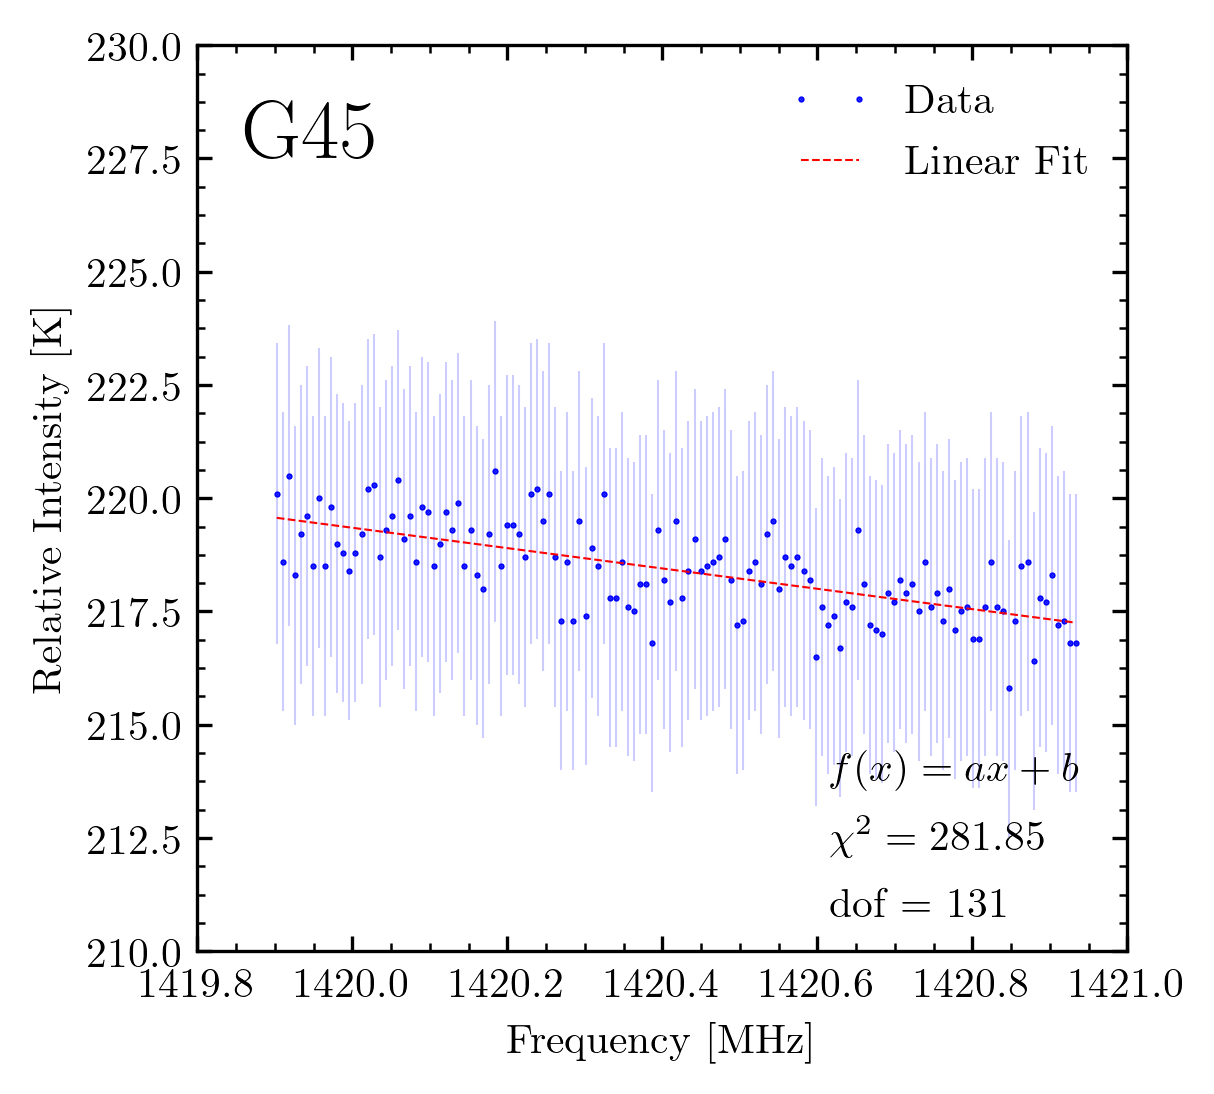

In [87]:
# G45_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins45_1, spec45_1, yerr=np.sqrt(spec45_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins45_1, spec45_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins45_1[0],bins45_1[-1], 100)
ax.plot(x, linear_func(x, *popt45_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G45')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=281.85$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_45_2.png')

In [90]:
# get rid of outliers
mask = (np.array(spectra2[10])>200)
spec50_1 = np.array(spectra2[10])[mask]
bins50_1 = np.array(bins)[mask]

In [91]:
# fit G50_1
popt50_1, pcov50_1 = linfit(bins50_1, spec50_1, np.sqrt(spec50_1/20), a=0.5, b=195)

# chisq50_1
chi50_1 = chisq(linear_func, popt50_1, bins50_1, spec50_1, np.sqrt(spec50_1/20))

# fit params and errors
b50_1 = popt50_1[0]
a50_1 = popt50_1[1]
b50_1err, a50_1err = np.sqrt(np.diag(pcov50_1))

In [ ]:
chi50_1

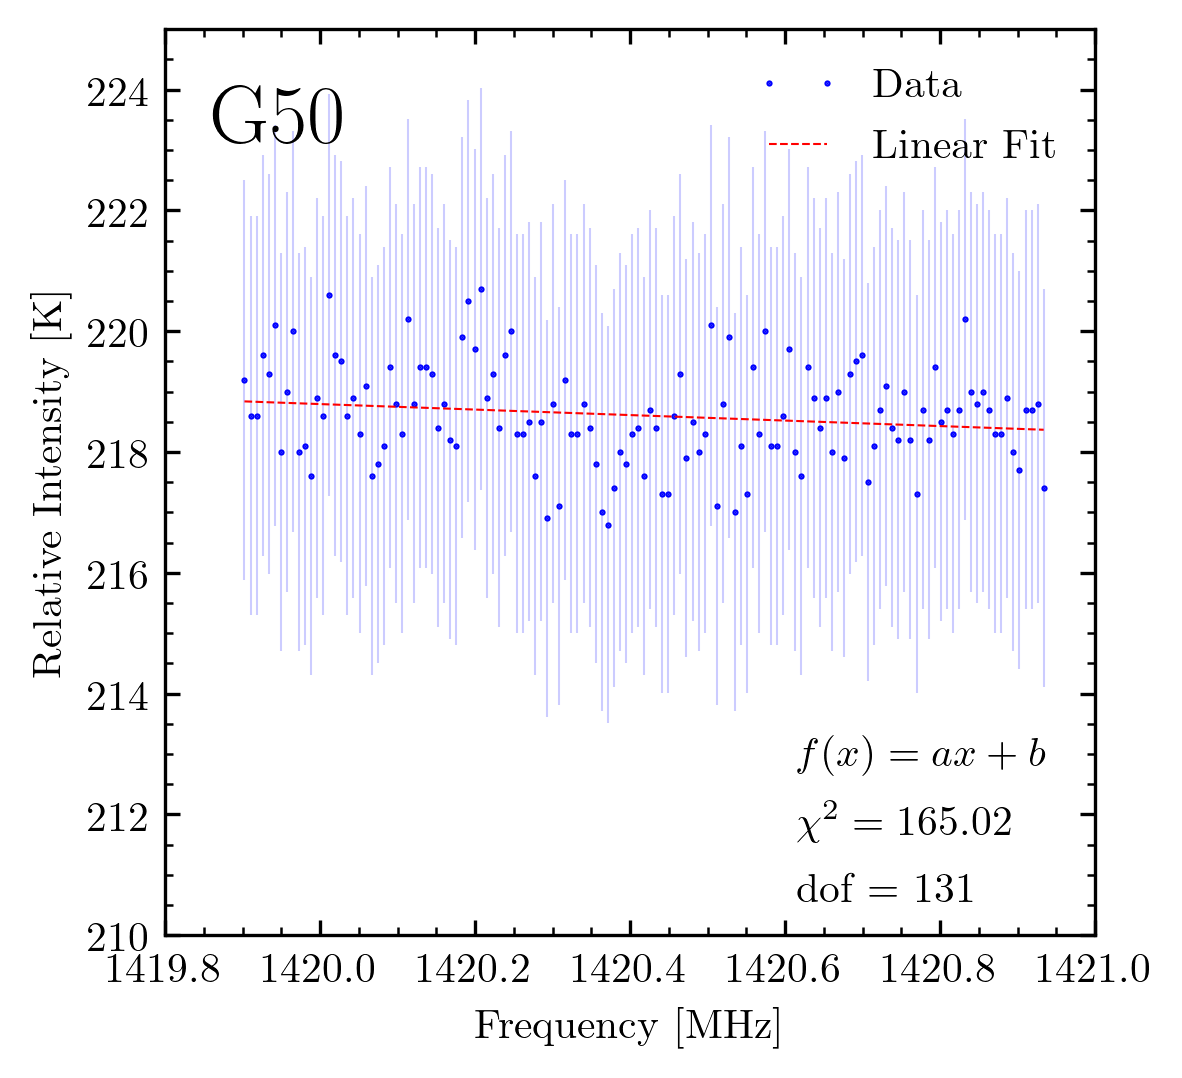

In [93]:
# G50_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins50_1, spec50_1, yerr=np.sqrt(spec50_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins50_1, spec50_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins50_1[0],bins50_1[-1], 100)
ax.plot(x, linear_func(x, *popt50_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G50')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=165.02$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_50_2.png')

In [96]:
# get rid of outliers
mask = (np.array(spectra2[11])>200)
spec55_1 = np.array(spectra2[11])[mask]
bins55_1 = np.array(bins)[mask]

In [97]:
# fit G55_1
popt55_1, pcov55_1 = linfit(bins55_1, spec55_1, np.sqrt(spec55_1/20), a=0.5, b=195)

# chisq55_1
chi55_1 = chisq(linear_func, popt55_1, bins55_1, spec55_1, np.sqrt(spec55_1/20))

# fit params and errors
b55_1 = popt55_1[0]
a55_1 = popt55_1[1]
b55_1err, a55_1err = np.sqrt(np.diag(pcov55_1))

In [98]:
chi55_1

6.587633086705811

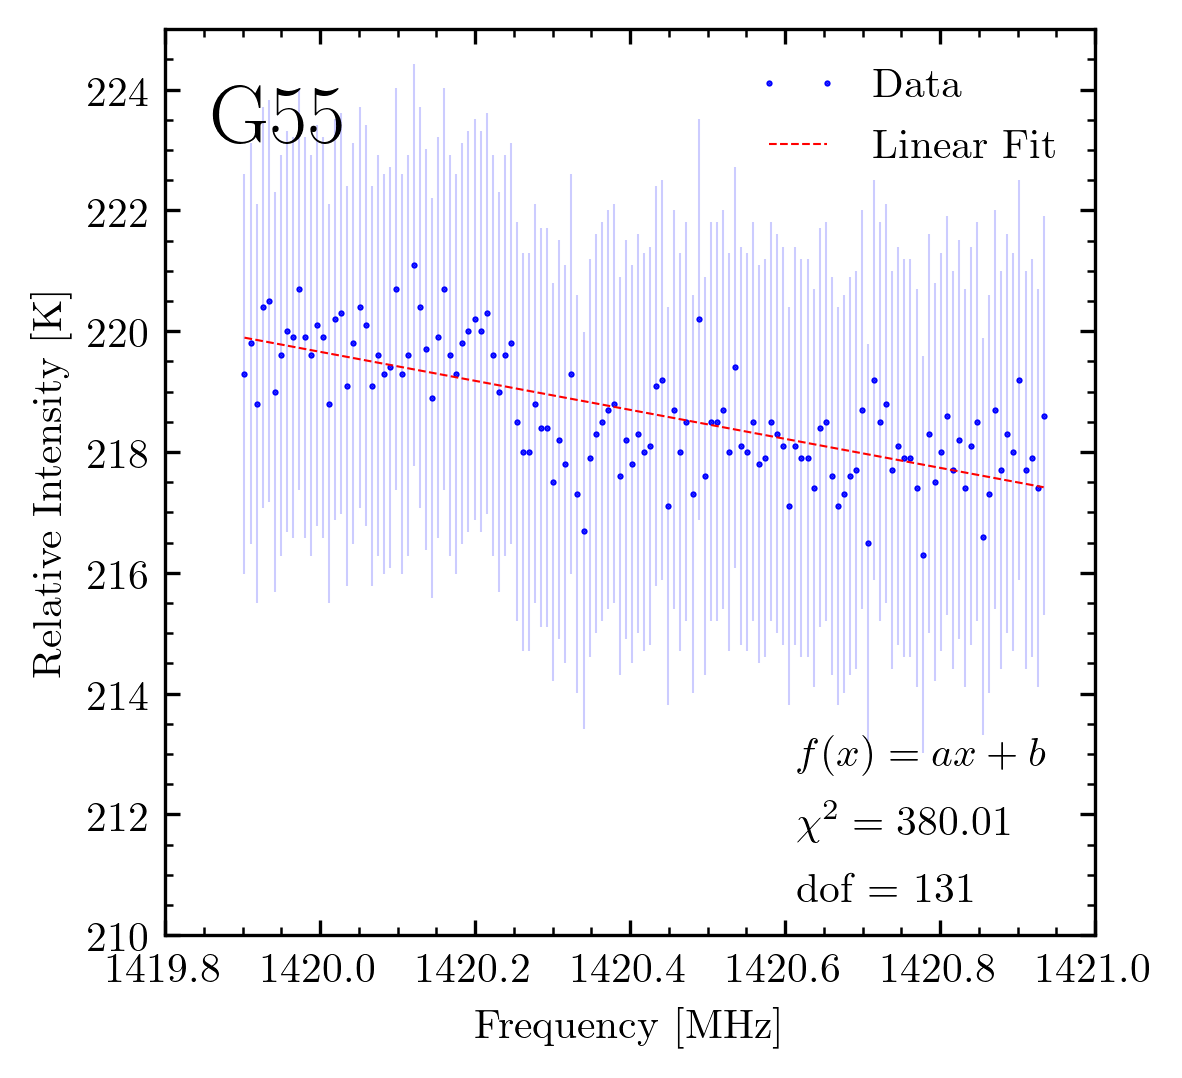

In [100]:
# G55_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins55_1, spec55_1, yerr=np.sqrt(spec55_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins55_1, spec55_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins55_1[0],bins55_1[-1], 100)
ax.plot(x, linear_func(x, *popt55_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G55')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=380.01$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_55_2.png')

In [102]:
# get rid of outliers
mask = (np.array(spectra2[12])>200)
spec60_1 = np.array(spectra2[12])[mask]
bins60_1 = np.array(bins)[mask]

In [103]:
# fit G60_1
popt60_1, pcov60_1 = linfit(bins60_1, spec60_1, np.sqrt(spec60_1/20), a=0.5, b=195)

# chisq60_1
chi60_1 = chisq(linear_func, popt60_1, bins60_1, spec60_1, np.sqrt(spec60_1/20))

# fit params and errors
b60_1 = popt60_1[0]
a60_1 = popt60_1[1]
b60_1err, a60_1err = np.sqrt(np.diag(pcov60_1))

In [104]:
chi60_1

7.788273071211895

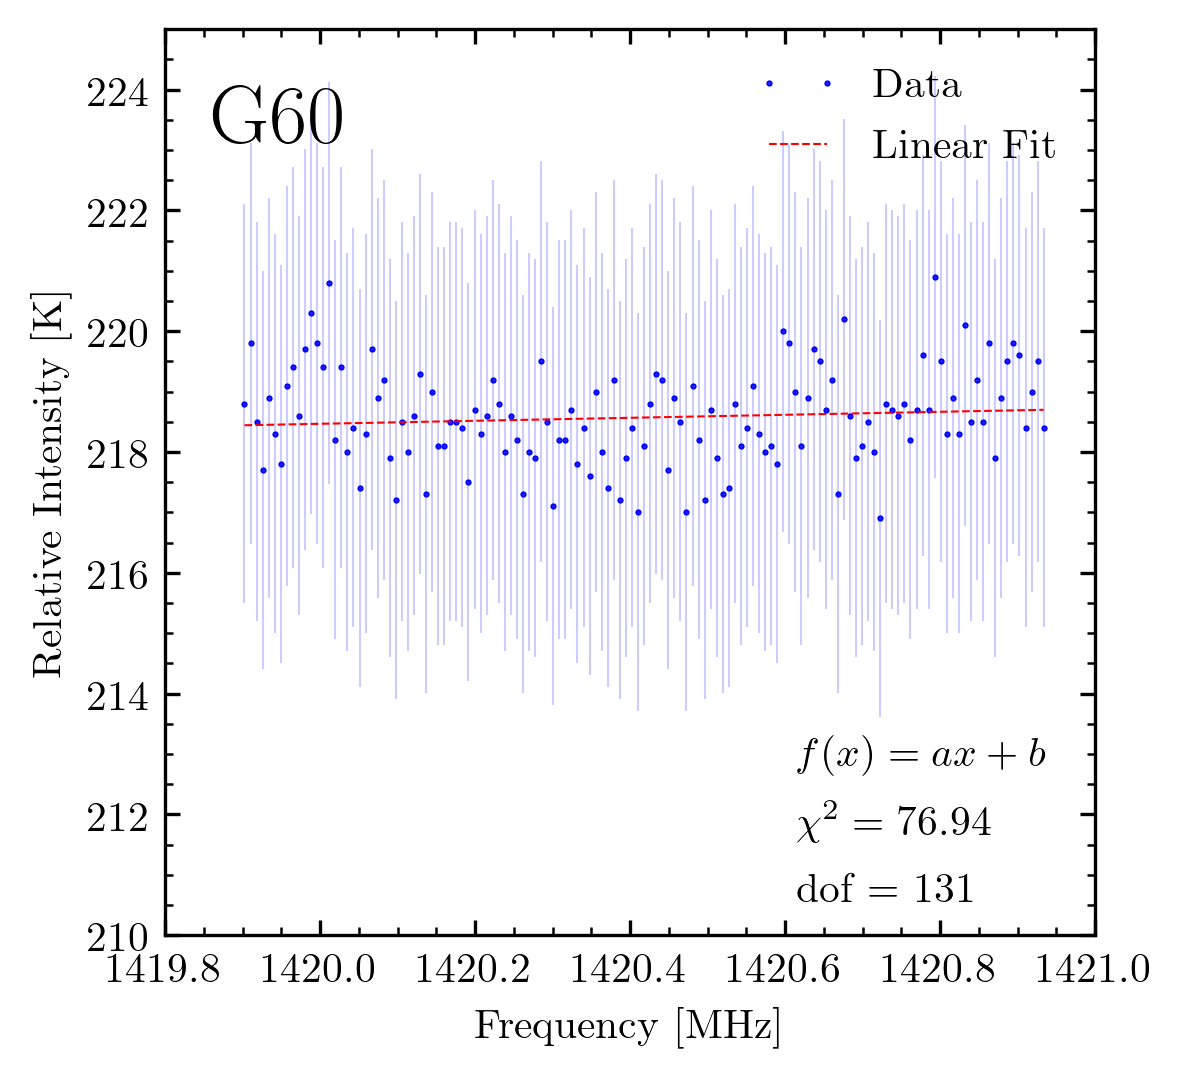

In [106]:
# G60_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(210,225), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins60_1, spec60_1, yerr=np.sqrt(spec60_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins60_1, spec60_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins60_1[0],bins60_1[-1], 100)
ax.plot(x, linear_func(x, *popt60_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G60')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=76.94$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_60_2.png')

In [109]:
# get rid of outliers
mask = (np.array(spectra2[13])>200)
spec65_1 = np.array(spectra2[13])[mask]
bins65_1 = np.array(bins)[mask]

In [110]:
# fit G65_1
popt65_1, pcov65_1 = linfit(bins65_1, spec65_1, np.sqrt(spec65_1/20), a=0.5, b=195)

# chisq65_1
chi65_1 = chisq(linear_func, popt65_1, bins65_1, spec65_1, np.sqrt(spec65_1/20))

# fit params and errors
b65_1 = popt65_1[0]
a65_1 = popt65_1[1]
b65_1err, a65_1err = np.sqrt(np.diag(pcov65_1))

In [111]:
chi65_1

8.950549786874948

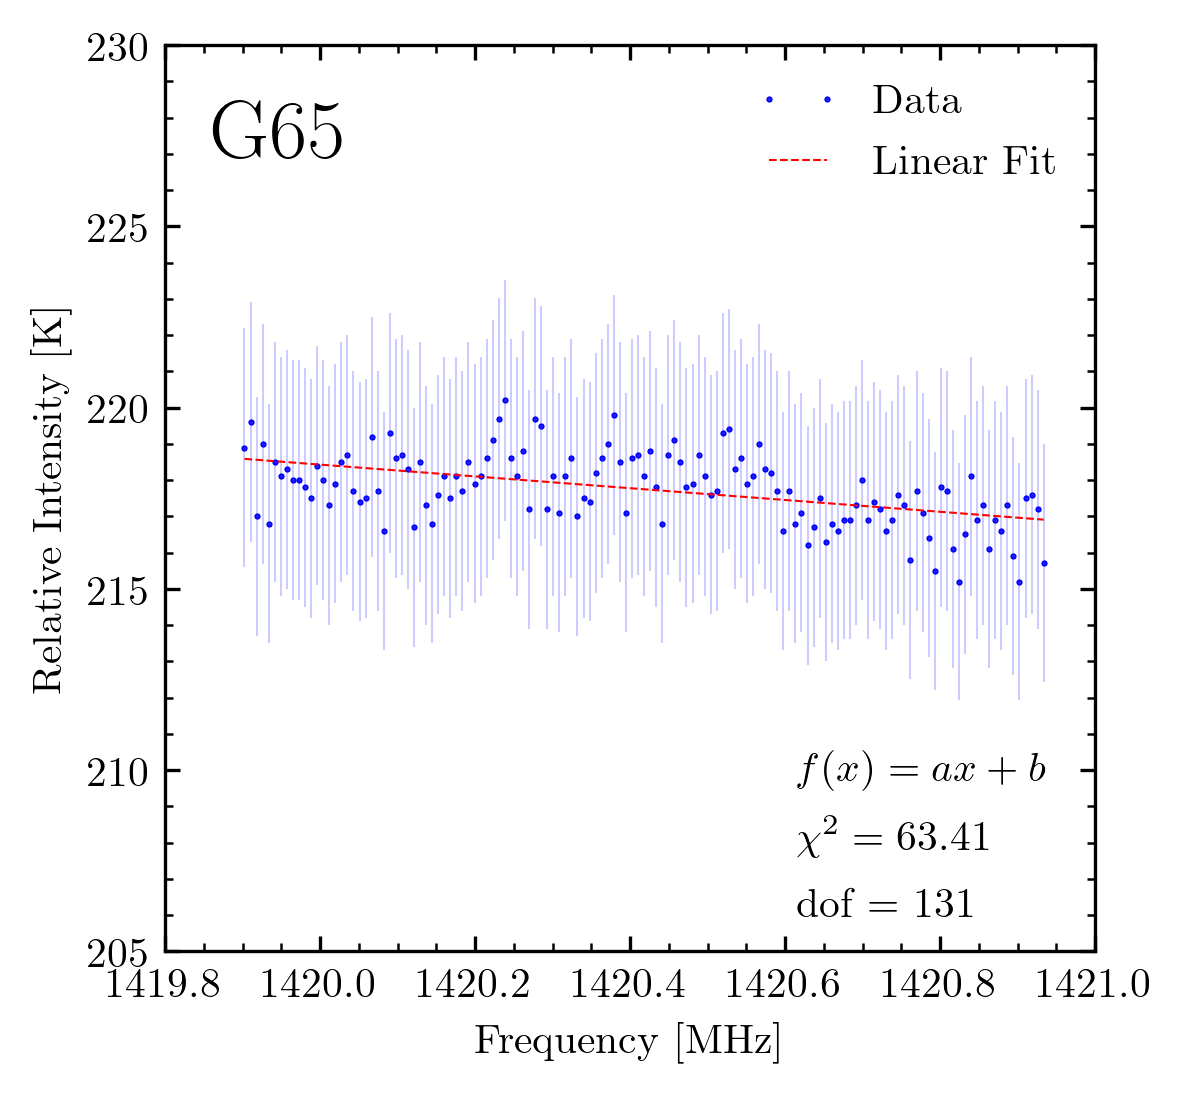

In [114]:
# G65_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins65_1, spec65_1, yerr=np.sqrt(spec65_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins65_1, spec65_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins65_1[0],bins65_1[-1], 100)
ax.plot(x, linear_func(x, *popt65_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G65')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=63.41$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_65_2.png')

In [117]:
# get rid of outliers
mask = (np.array(spectra2[14])>200)
spec70_1 = np.array(spectra2[14])[mask]
bins70_1 = np.array(bins)[mask]

In [118]:
# fit G70_1
popt70_1, pcov70_1 = linfit(bins70_1, spec70_1, np.sqrt(spec70_1/20), a=0.5, b=195)

# chisq70_1
chi70_1 = chisq(linear_func, popt70_1, bins70_1, spec70_1, np.sqrt(spec70_1/20))

# fit params and errors
b70_1 = popt70_1[0]
a70_1 = popt70_1[1]
b70_1err, a70_1err = np.sqrt(np.diag(pcov70_1))

In [119]:
chi70_1

8.439786500807653

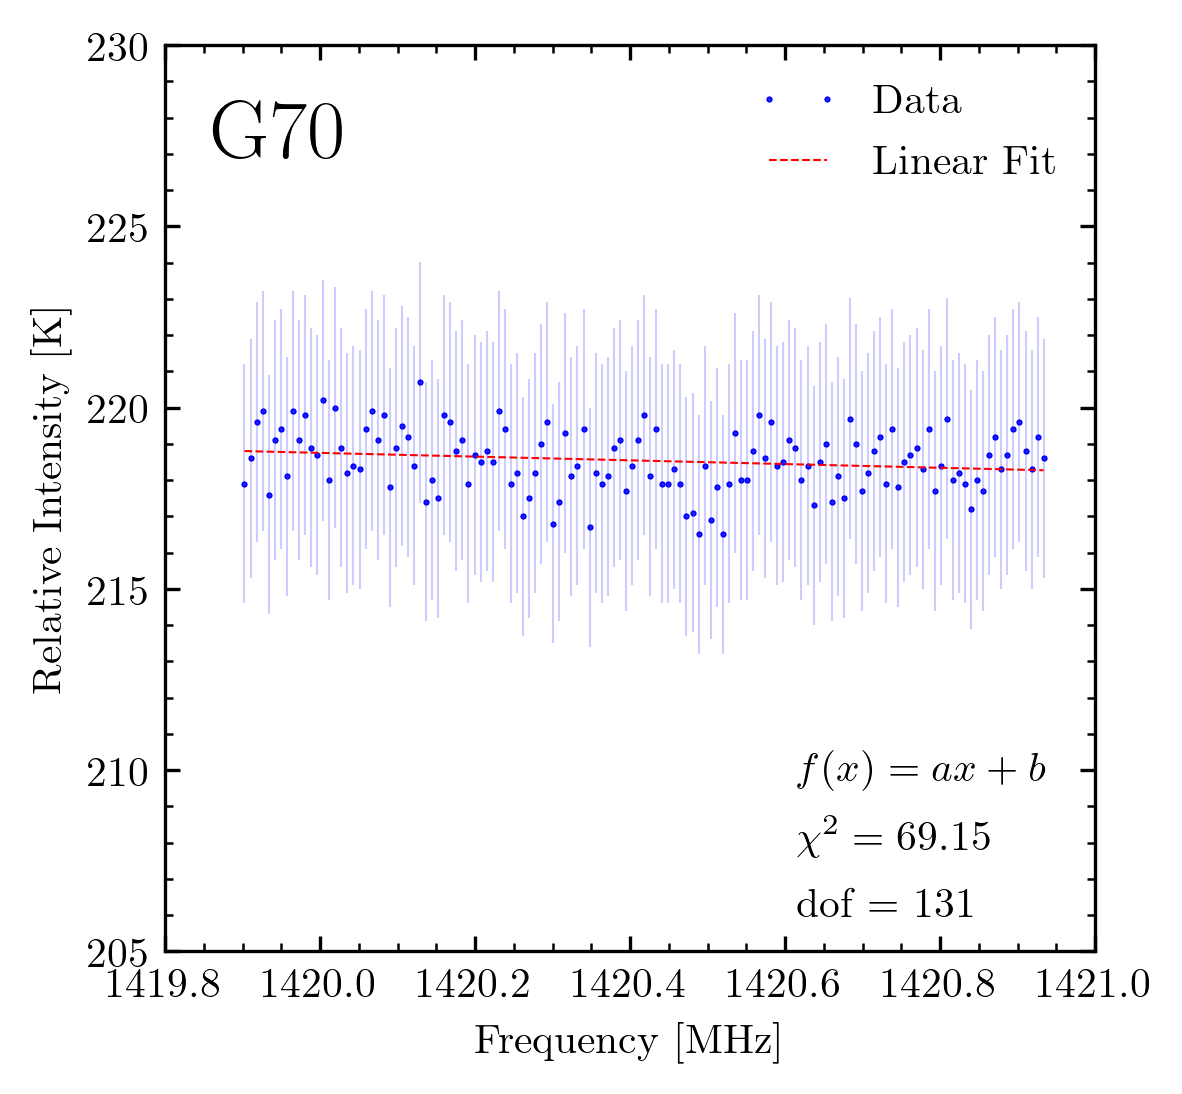

In [122]:
# G70_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins70_1, spec70_1, yerr=np.sqrt(spec70_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins70_1, spec70_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins70_1[0],bins70_1[-1], 100)
ax.plot(x, linear_func(x, *popt70_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G70')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=69.15$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_70_2.png')

In [125]:
# get rid of outliers
mask = (np.array(spectra2[15])>200)
spec75_1 = np.array(spectra2[15])[mask]
bins75_1 = np.array(bins)[mask]

In [126]:
# fit G75_1
popt75_1, pcov75_1 = linfit(bins75_1, spec75_1, np.sqrt(spec75_1/20), a=0.5, b=195)

# chisq75_1
chi75_1 = chisq(linear_func, popt75_1, bins75_1, spec75_1, np.sqrt(spec75_1/20))

# fit params and errors
b75_1 = popt75_1[0]
a75_1 = popt75_1[1]
b75_1err, a75_1err = np.sqrt(np.diag(pcov75_1))

In [127]:
chi75_1

6.726375463148335

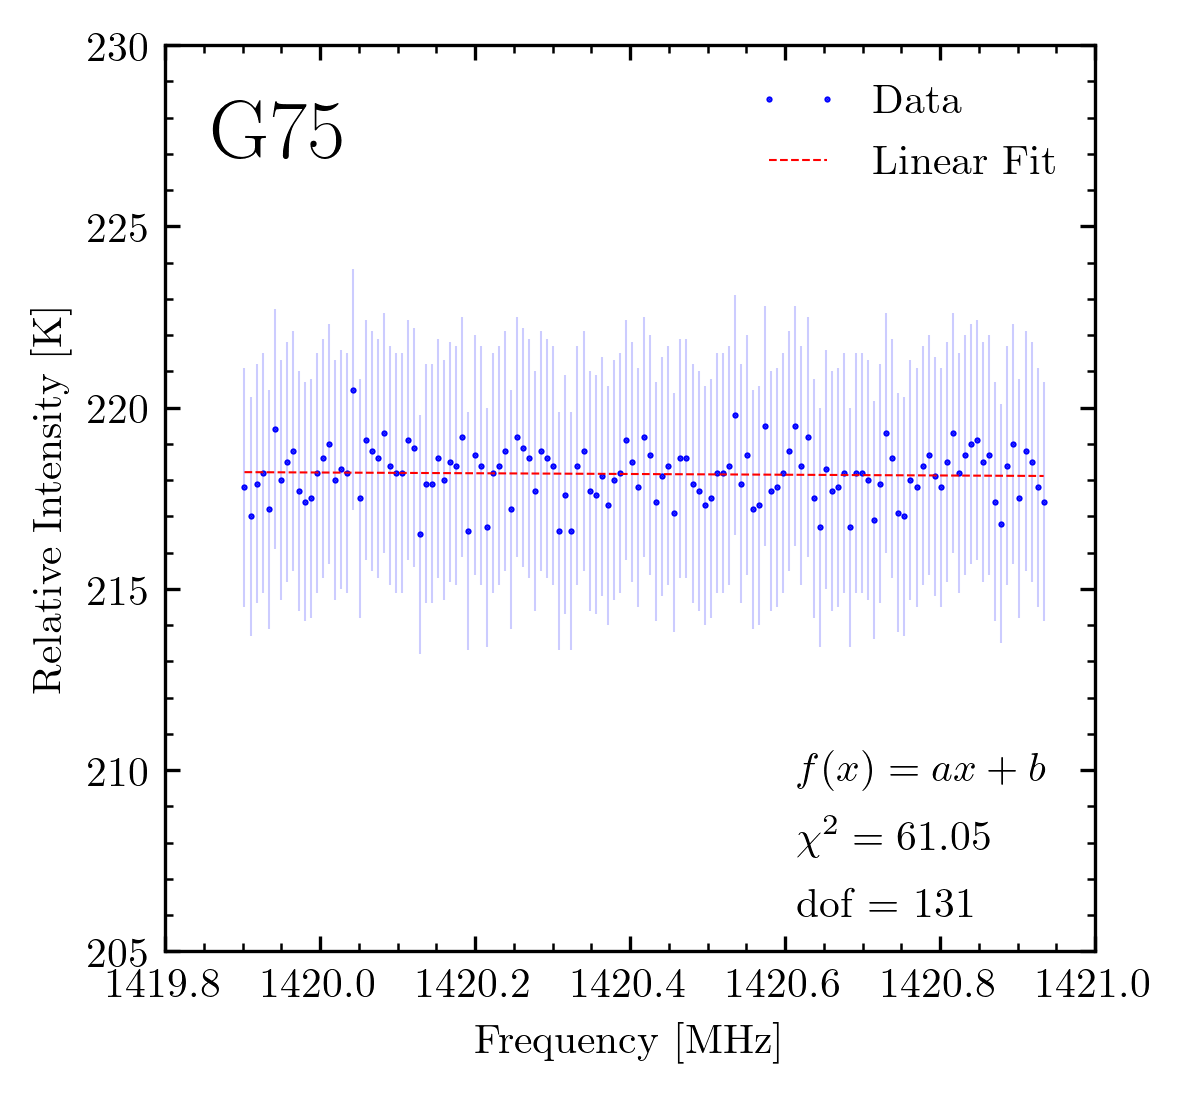

In [128]:
# G75_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins75_1, spec75_1, yerr=np.sqrt(spec75_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins75_1, spec75_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins75_1[0],bins75_1[-1], 100)
ax.plot(x, linear_func(x, *popt75_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G75')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=61.05$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_75_2.png')

In [134]:
# get rid of outliers
mask = (np.array(spectra2[16])>200)
spec80_1 = np.array(spectra2[16])[mask]
bins80_1 = np.array(bins)[mask]

In [135]:
# fit G80_1
popt80_1, pcov80_1 = linfit(bins80_1, spec80_1, np.sqrt(spec80_1/20), a=0.5, b=195)

# chisq80_1
chi80_1 = chisq(linear_func, popt80_1, bins80_1, spec80_1, np.sqrt(spec80_1/20))

# fit params and errors
b80_1 = popt80_1[0]
a80_1 = popt80_1[1]
b80_1err, a80_1err = np.sqrt(np.diag(pcov80_1))

In [136]:
chi80_1

7.600064738556882

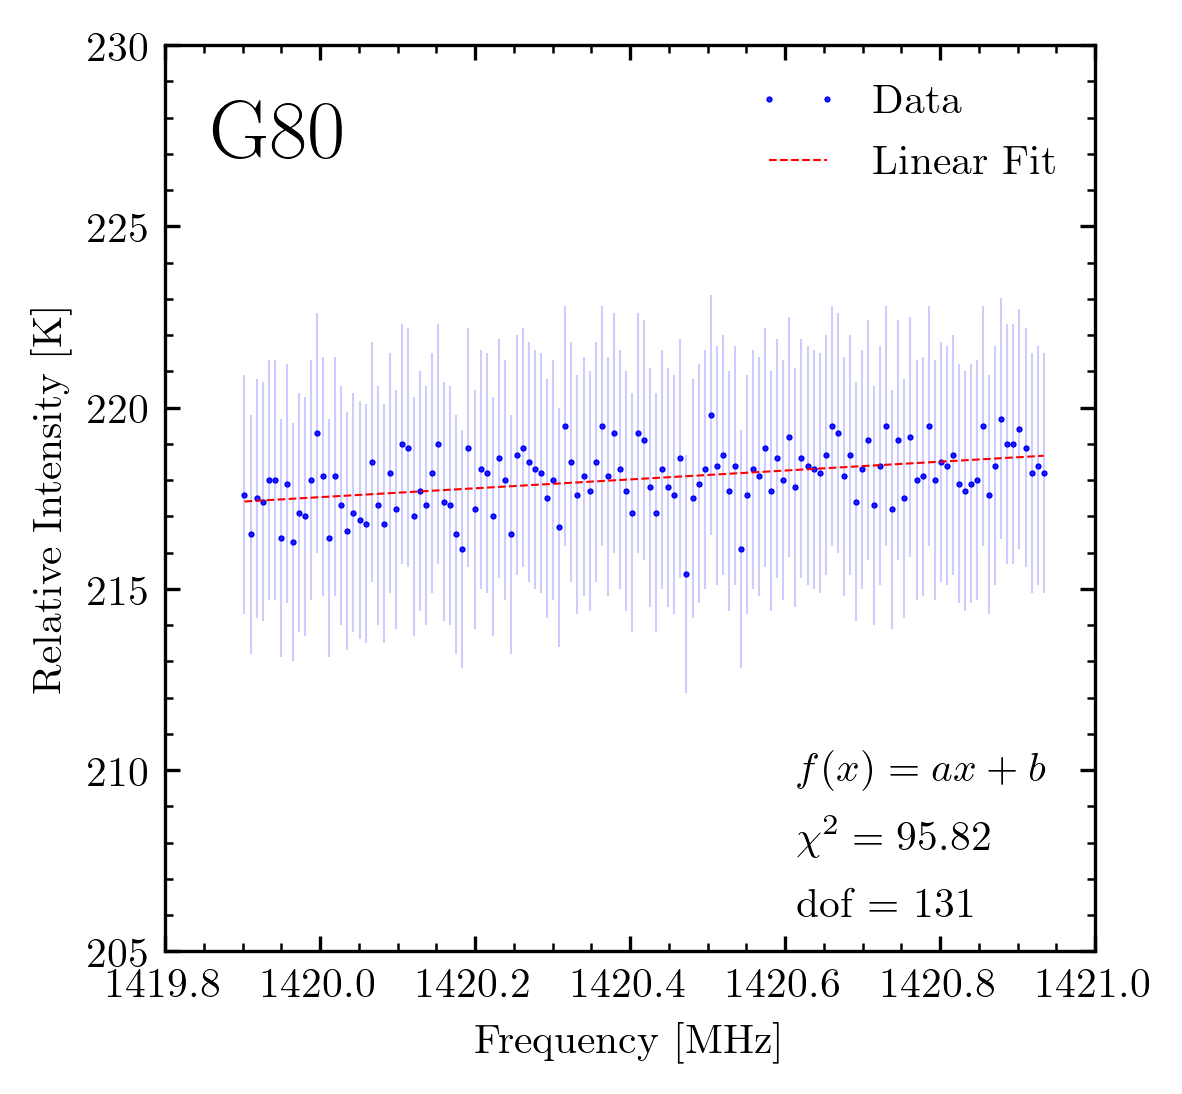

In [138]:
# G80_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins80_1, spec80_1, yerr=np.sqrt(spec80_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins80_1, spec80_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins80_1[0],bins80_1[-1], 100)
ax.plot(x, linear_func(x, *popt80_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G80')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=95.82$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_80_2.png')

In [141]:
# get rid of outliers
mask = (np.array(spectra2[17])>200)
spec85_1 = np.array(spectra2[17])[mask]
bins85_1 = np.array(bins)[mask]

In [142]:
# fit G85_1
popt85_1, pcov85_1 = linfit(bins85_1, spec85_1, np.sqrt(spec85_1/20), a=0.5, b=195)

# chisq85_1
chi85_1 = chisq(linear_func, popt85_1, bins85_1, spec85_1, np.sqrt(spec85_1/20))

# fit params and errors
b85_1 = popt85_1[0]
a85_1 = popt85_1[1]
b85_1err, a85_1err = np.sqrt(np.diag(pcov85_1))

In [143]:
chi85_1

8.928452046621665

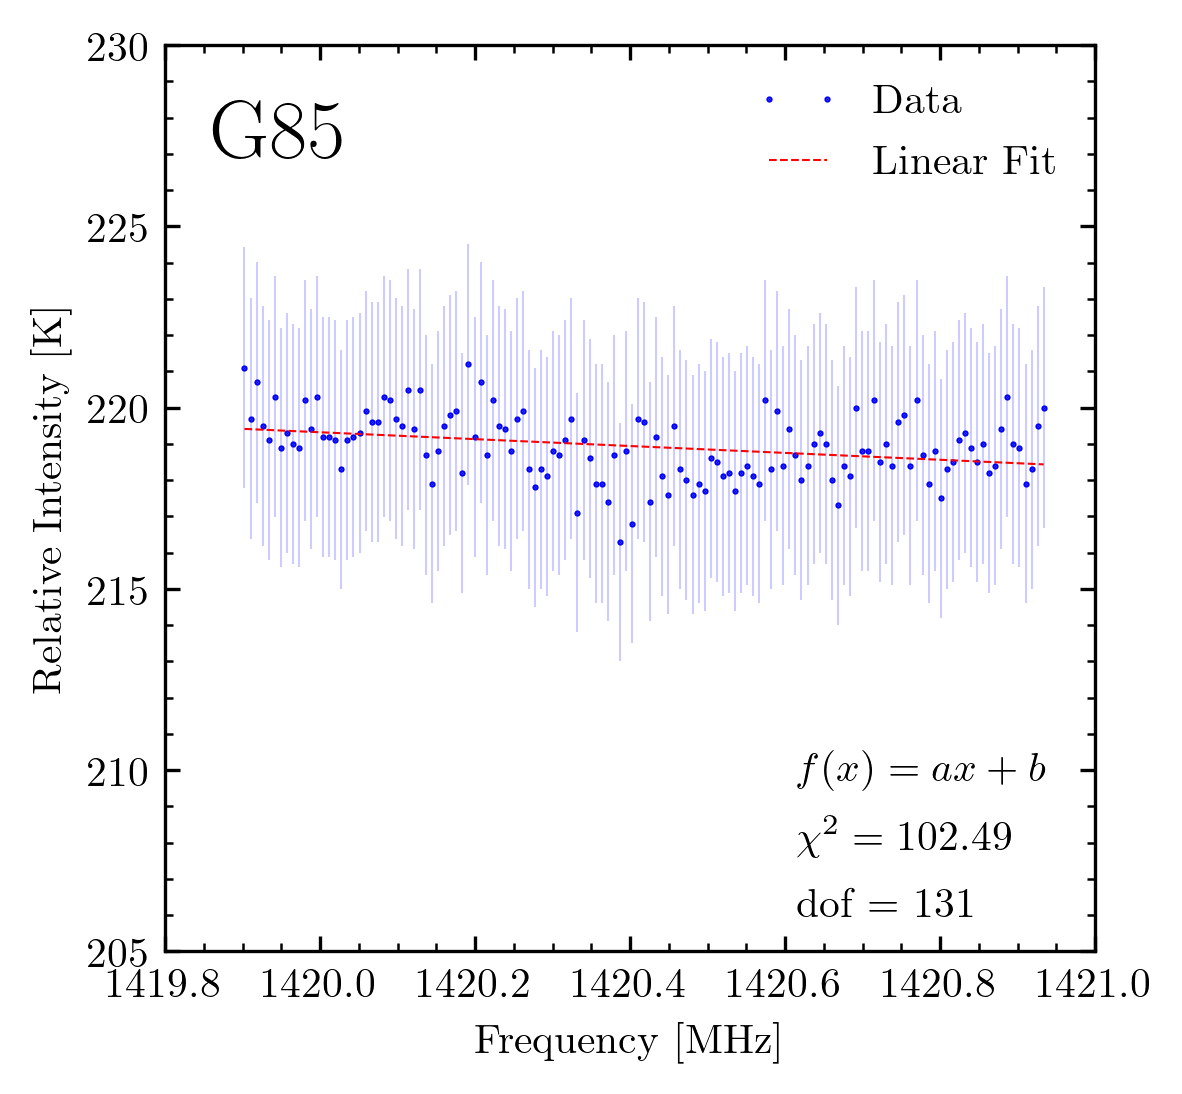

In [144]:
# G85_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins85_1, spec85_1, yerr=np.sqrt(spec85_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins85_1, spec85_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins85_1[0],bins85_1[-1], 100)
ax.plot(x, linear_func(x, *popt85_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G85')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=102.49$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_85_2.png')

In [146]:
# get rid of outliers
mask = (np.array(spectra2[18])>200)
spec90_1 = np.array(spectra2[18])[mask]
bins90_1 = np.array(bins)[mask]

In [147]:
# fit G90_1
popt90_1, pcov90_1 = linfit(bins90_1, spec90_1, np.sqrt(spec90_1/20), a=0.5, b=195)

# chisq90_1
chi90_1 = chisq(linear_func, popt90_1, bins90_1, spec90_1, np.sqrt(spec90_1/20))

# fit params and errors
b90_1 = popt90_1[0]
a90_1 = popt90_1[1]
b90_1err, a90_1err = np.sqrt(np.diag(pcov90_1))

In [148]:
chi90_1

5.718773206124222

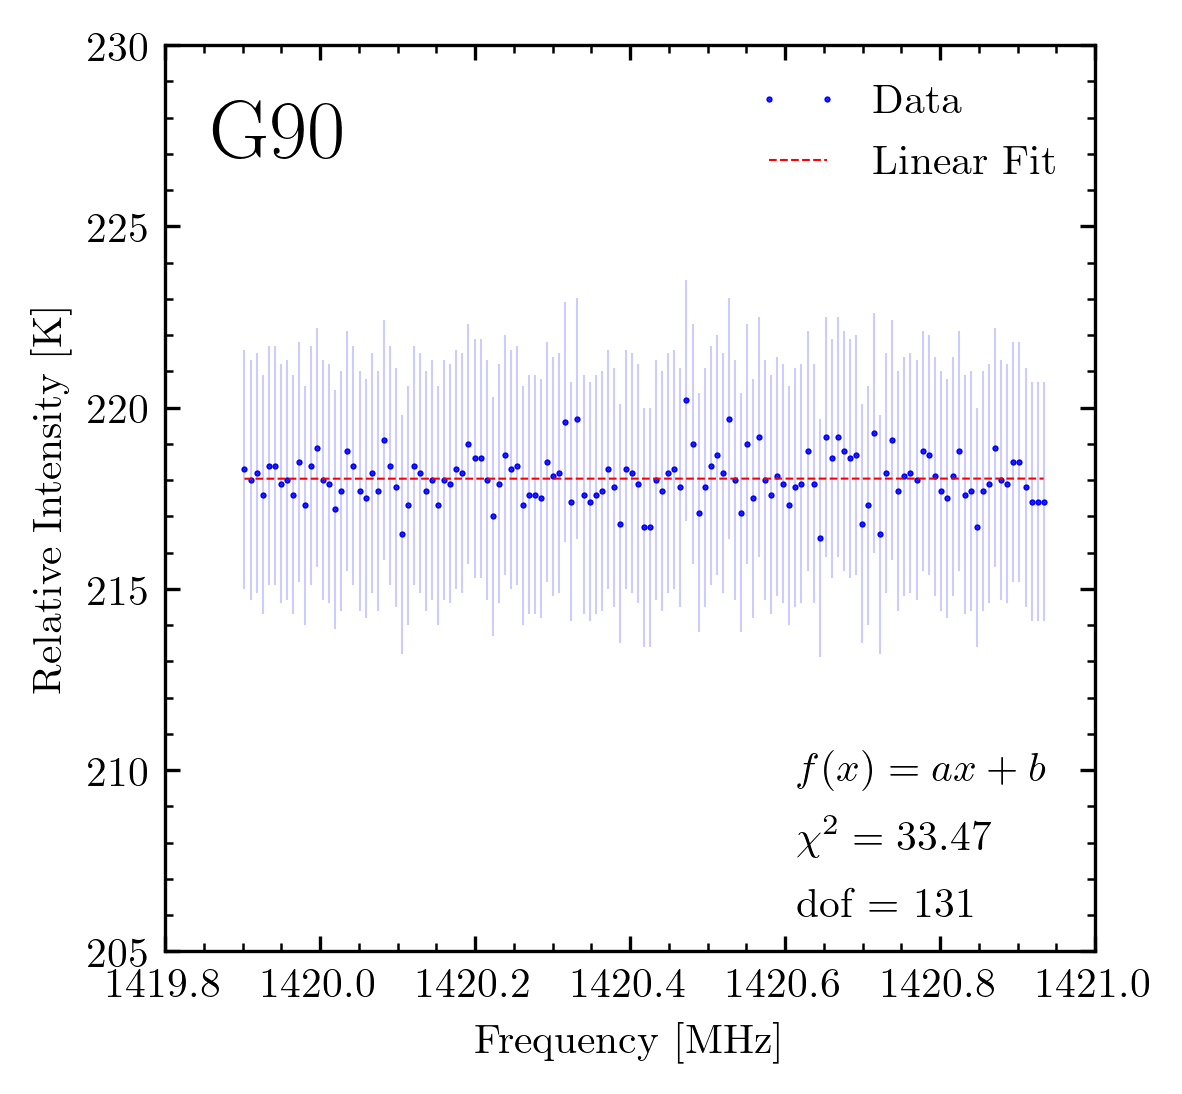

In [149]:
# G90_1
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(205,230), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins90_1, spec90_1, yerr=np.sqrt(spec90_1/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins90_1, spec90_1, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins90_1[0],bins90_1[-1], 100)
ax.plot(x, linear_func(x, *popt90_1), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G90')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=33.47$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec_linfit_90_2.png')

**Subtract the Linear Background from Each Spectrum**

In [150]:
# spectra
rel_spec0 = spec0_1-linear_func(bins0_1, *popt0_1)
rel_spec5 = spec5_1-linear_func(bins5_1, *popt5_1)
rel_spec10 = spec10_1-linear_func(bins10_1, *popt10_1)
rel_spec15 = spec15_1-linear_func(bins15_1, *popt15_1)
rel_spec20 = spec20_1-linear_func(bins20_1, *popt20_1)
rel_spec25 = spec25_1-linear_func(bins25_1, *popt25_1)
rel_spec30 = spec30_1-linear_func(bins30_1, *popt30_1)
rel_spec35 = spec35_1-linear_func(bins35_1, *popt35_1)
rel_spec40 = spec40_1-linear_func(bins40_1, *popt40_1)
rel_spec45 = spec45_1-linear_func(bins45_1, *popt45_1)
rel_spec50 = spec50_1-linear_func(bins50_1, *popt50_1)
rel_spec55 = spec55_1-linear_func(bins55_1, *popt55_1)
rel_spec60 = spec60_1-linear_func(bins60_1, *popt60_1)
rel_spec65 = spec65_1-linear_func(bins65_1, *popt65_1)
rel_spec70 = spec70_1-linear_func(bins70_1, *popt70_1)
rel_spec75 = spec75_1-linear_func(bins75_1, *popt75_1)
rel_spec80 = spec80_1-linear_func(bins80_1, *popt80_1)
rel_spec85 = spec85_1-linear_func(bins85_1, *popt85_1)
rel_spec90 = spec90_1-linear_func(bins90_1, *popt90_1)

In [151]:
# errs
errs_spec0 = np.sqrt(np.abs(spec0_1/20-linear_func(bins0_1, *popt0_1)/20))
errs_spec5 = np.sqrt(np.abs(spec5_1/20-linear_func(bins5_1, *popt5_1)/20))
errs_spec10 = np.sqrt(np.abs(spec10_1/20-linear_func(bins10_1, *popt10_1)/20))
errs_spec15 = np.sqrt(np.abs(spec15_1/20-linear_func(bins15_1, *popt15_1)/20))
errs_spec20 = np.sqrt(np.abs(spec20_1/20-linear_func(bins20_1, *popt20_1)/20))
errs_spec25 = np.sqrt(np.abs(spec25_1/20-linear_func(bins25_1, *popt25_1)/20))
errs_spec30 = np.sqrt(np.abs(spec30_1/20-linear_func(bins30_1, *popt30_1)/20))
errs_spec35 = np.sqrt(np.abs(spec35_1/20-linear_func(bins35_1, *popt35_1)/20))
errs_spec40 = np.sqrt(np.abs(spec40_1/20-linear_func(bins40_1, *popt40_1)/20))
errs_spec45 = np.sqrt(np.abs(spec45_1/20-linear_func(bins45_1, *popt45_1)/20))
errs_spec50 = np.sqrt(np.abs(spec50_1/20-linear_func(bins50_1, *popt50_1)/20))
errs_spec55 = np.sqrt(np.abs(spec55_1/20-linear_func(bins55_1, *popt55_1)/20))
errs_spec60 = np.sqrt(np.abs(spec60_1/20-linear_func(bins60_1, *popt60_1)/20))
errs_spec65 = np.sqrt(np.abs(spec65_1/20-linear_func(bins65_1, *popt65_1)/20))
errs_spec70 = np.sqrt(np.abs(spec70_1/20-linear_func(bins70_1, *popt70_1)/20))
errs_spec75 = np.sqrt(np.abs(spec75_1/20-linear_func(bins75_1, *popt75_1)/20))
errs_spec80 = np.sqrt(np.abs(spec80_1/20-linear_func(bins80_1, *popt80_1)/20))
errs_spec85 = np.sqrt(np.abs(spec85_1/20-linear_func(bins85_1, *popt85_1)/20))
errs_spec90 = np.sqrt(np.abs(spec90_1/20-linear_func(bins90_1, *popt90_1)/20))

Create a Fit Function of Four Gaussians and a Linear Offset

In [152]:
def gauss_func(x, a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b):
    gauss1 = a1*np.exp((-(x-mu1)**2)/(2*sig1**2))
    gauss2 = a2*np.exp((-(x-mu2)**2)/(2*sig2**2))
    gauss3 = a3*np.exp((-(x-mu3)**2)/(2*sig3**2))
    gauss4 = a4*np.exp((-(x-mu4)**2)/(2*sig4**2))
        
    return gauss1 + gauss2 + gauss3 + gauss4 + b

In [153]:
def gauss_fit(bins,freqs,errs, a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b):
    popt, pcov = curve_fit(gauss_func, bins, freqs, sigma=errs, 
                           p0=[a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b], 
                           absolute_sigma=True, bounds=[[0,1419,-5,0,1419,-5,0,1419,-5,
                                                        0,1419,-5,-10],[20,1421,5,20,1421,5,
                                                                       20,1421,5,20,1421,5,10]])
    return popt, pcov

**Plot the Background Subtracted Spectra with Gaussian Fits**

In [154]:
gopt0, gcov0 = gauss_fit(bins=bins0_1, freqs=rel_spec0, errs=errs_spec0, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=6, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

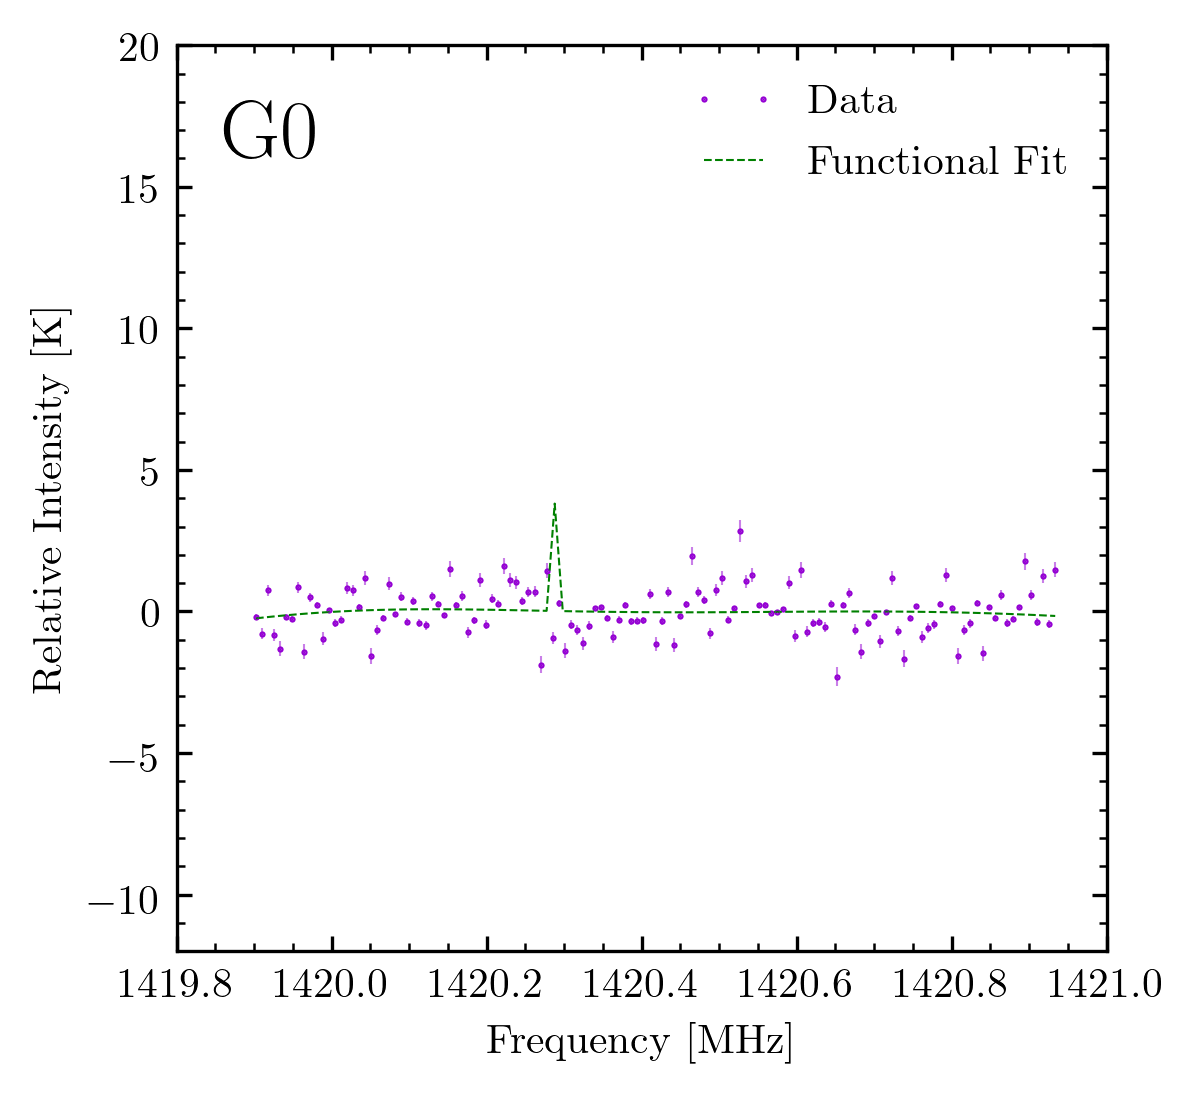

In [156]:
# G0
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins0_1, rel_spec0, yerr=errs_spec0, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins0_1, rel_spec0, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins0_1[0], bins0_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt0), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G0')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec0_gauss_fit_2.png')

In [157]:
gopt5, gcov5 = gauss_fit(bins=bins5_1, freqs=rel_spec5, errs=errs_spec5, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

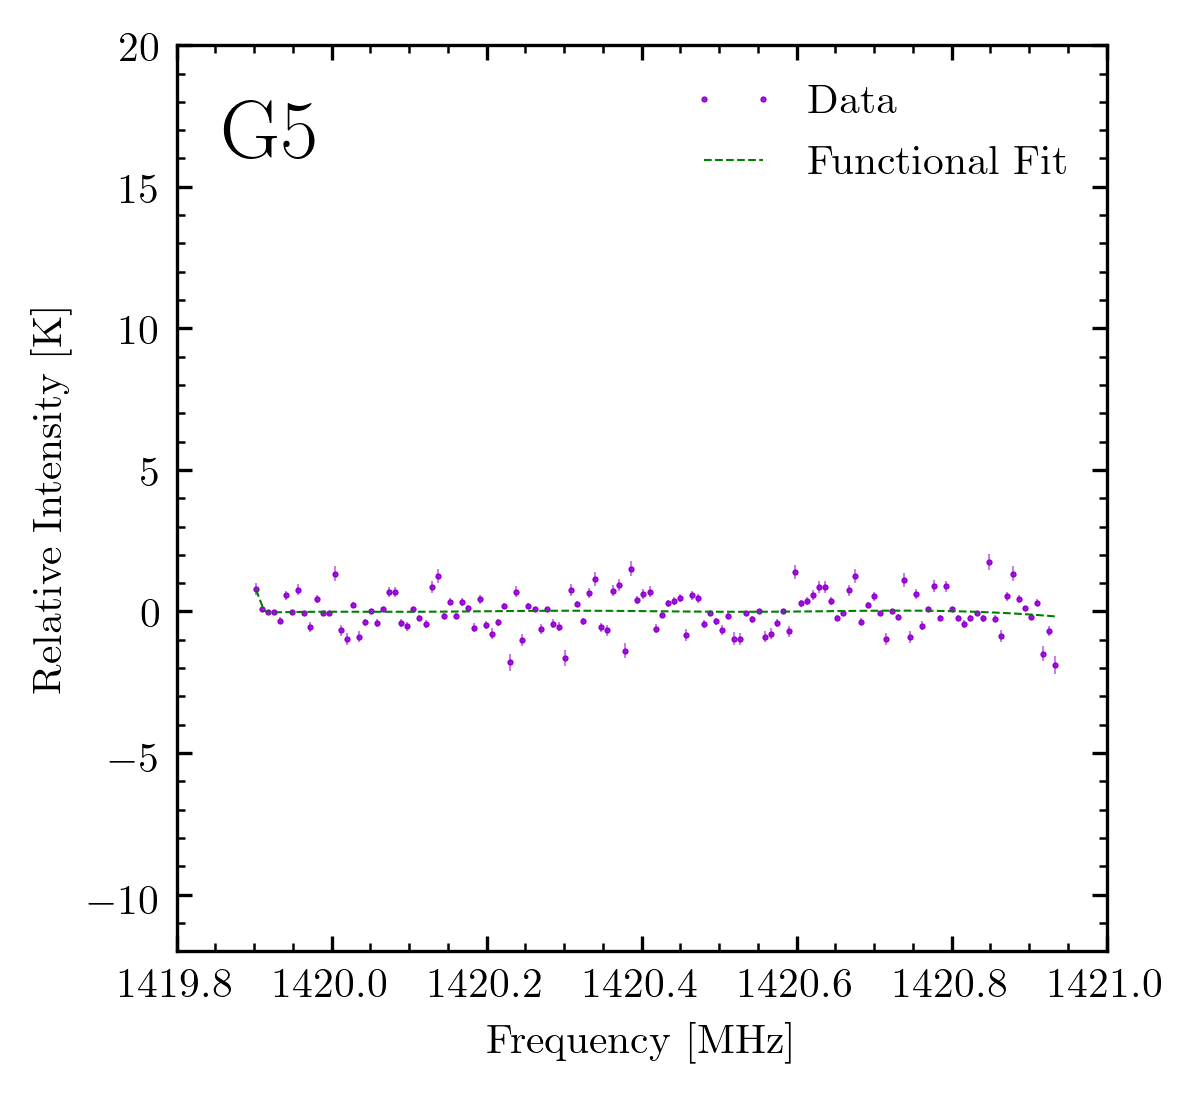

In [158]:
# G5
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins5_1, rel_spec5, yerr=errs_spec5, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins5_1, rel_spec5, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins5_1[0], bins5_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt5), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G5')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec5_gauss_fit_2.png')

In [159]:
gopt10, gcov10 = gauss_fit(bins=bins10_1, freqs=rel_spec10, errs=errs_spec10, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

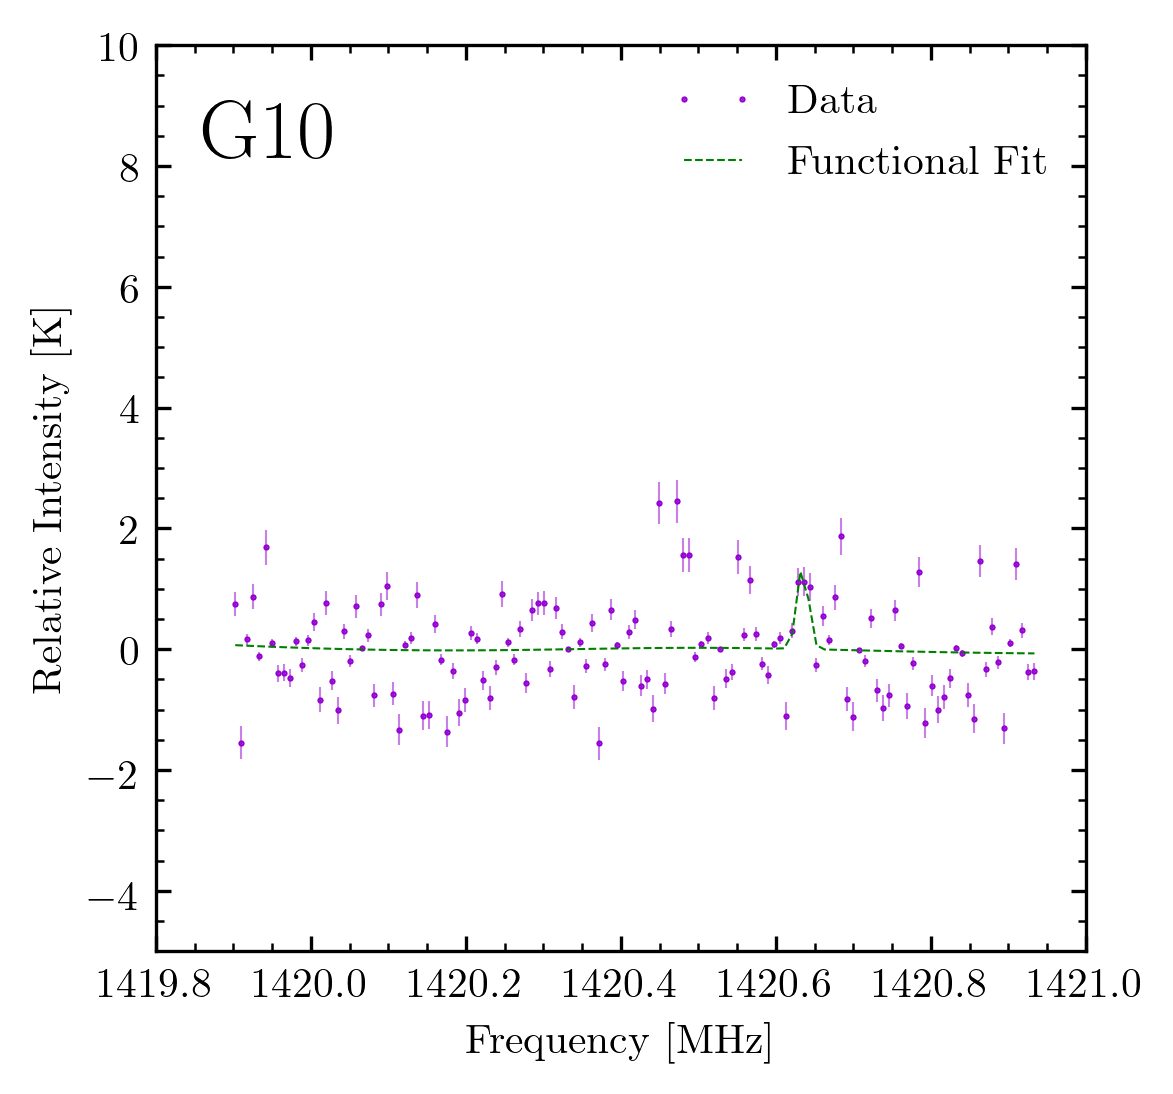

In [160]:
# G10
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,10), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins10_1, rel_spec10, yerr=errs_spec10, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins10_1, rel_spec10, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins10_1[0], bins10_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt10), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G10')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec10_gauss_fit_2.png')

In [161]:
gopt15, gcov15 = gauss_fit(bins=bins15_1, freqs=rel_spec15, errs=errs_spec15, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

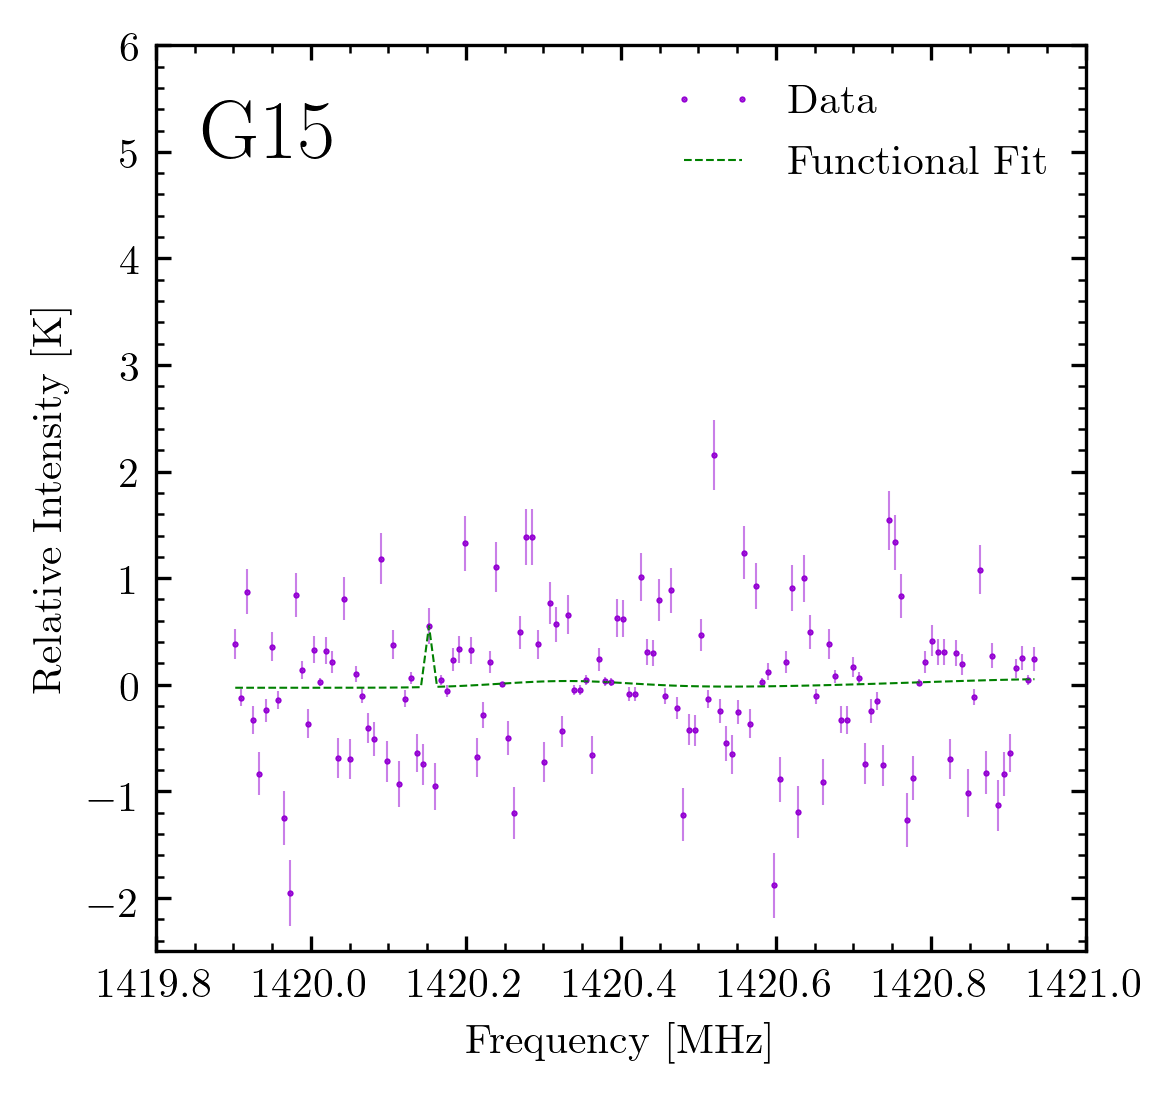

In [162]:
# G15
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-2.5,6), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins15_1, rel_spec15, yerr=errs_spec15, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins15_1, rel_spec15, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins15_1[0], bins15_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt15), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G15')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec15_gauss_fit_2.png')

In [166]:
gopt20, gcov20 = gauss_fit(bins=bins20_1, freqs=rel_spec20, errs=errs_spec20, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=0)

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

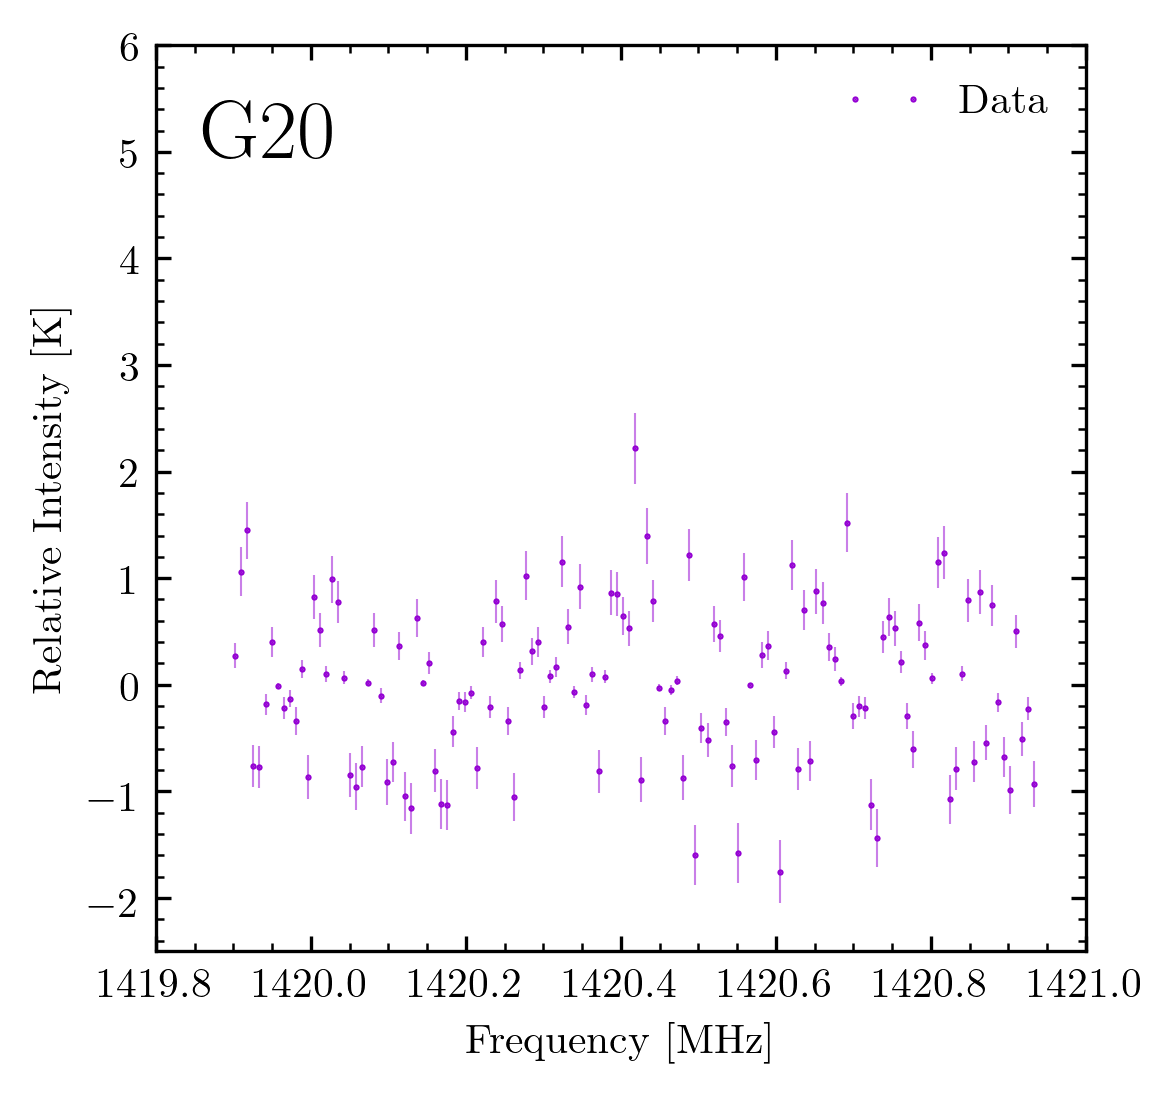

In [165]:
# G20
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-2.5,6), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins20_1, rel_spec20, yerr=errs_spec20, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins20_1, rel_spec20, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins20_1[0], bins20_1[-1], 100)
#ax.plot(x, gauss_func(x, *gopt20), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G20')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec20_gauss_fit_2.png')

In [ ]:
gopt25, gcov25 = gauss_fit(bins=bins25_1, freqs=rel_spec25, errs=errs_spec25, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

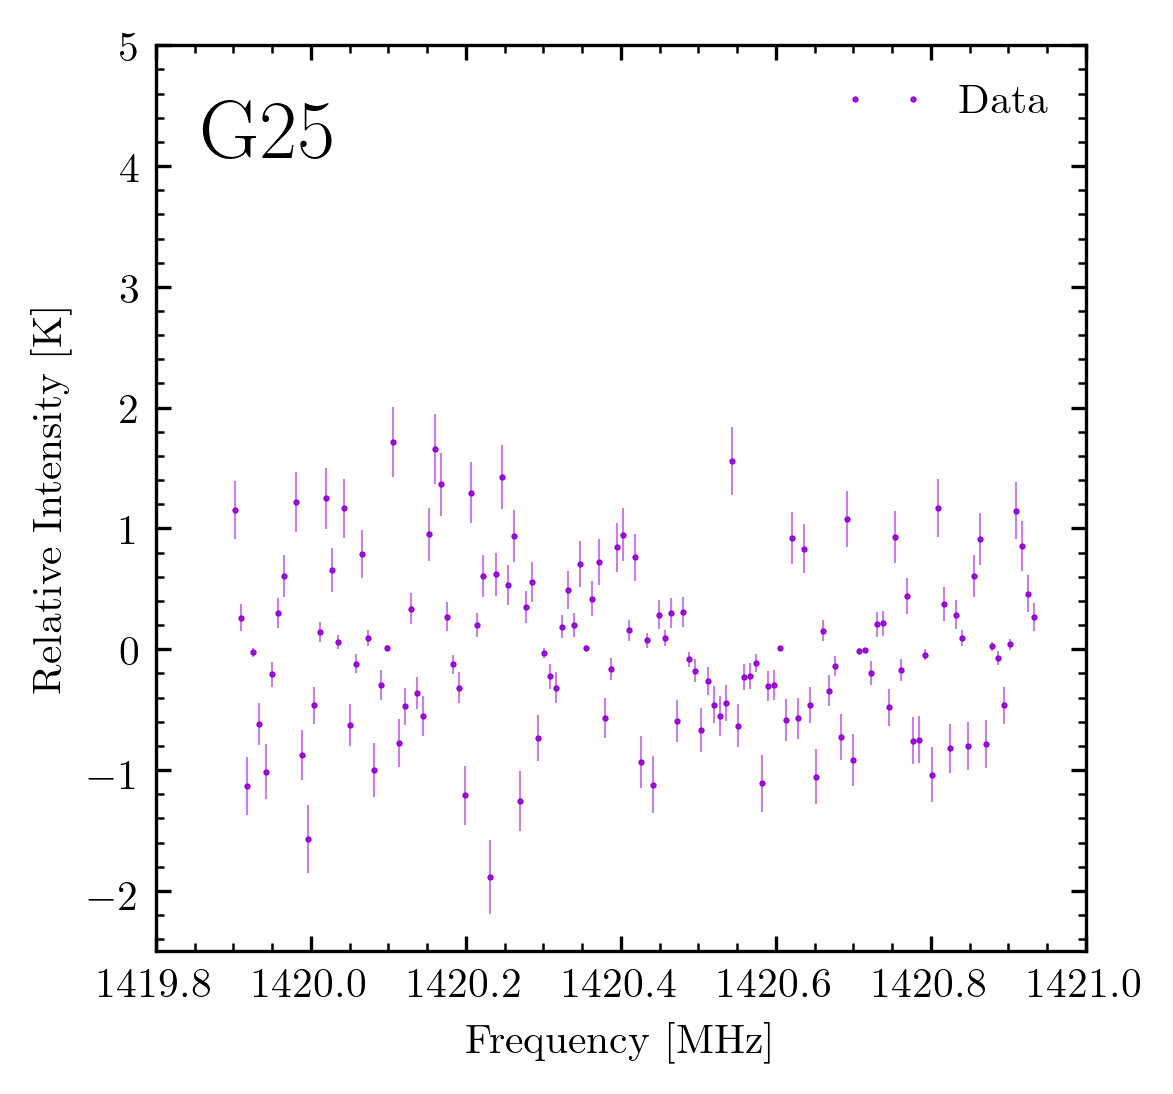

In [167]:
# G25
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-2.5,5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins25_1, rel_spec25, yerr=errs_spec25, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins25_1, rel_spec25, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins25_1[0], bins25_1[-1], 100)
#ax.plot(x, gauss_func(x, *gopt25), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G25')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec25_gauss_fit.png')

In [ ]:
gopt30, gcov30 = gauss_fit(bins=bins30_1, freqs=rel_spec30, errs=errs_spec30, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

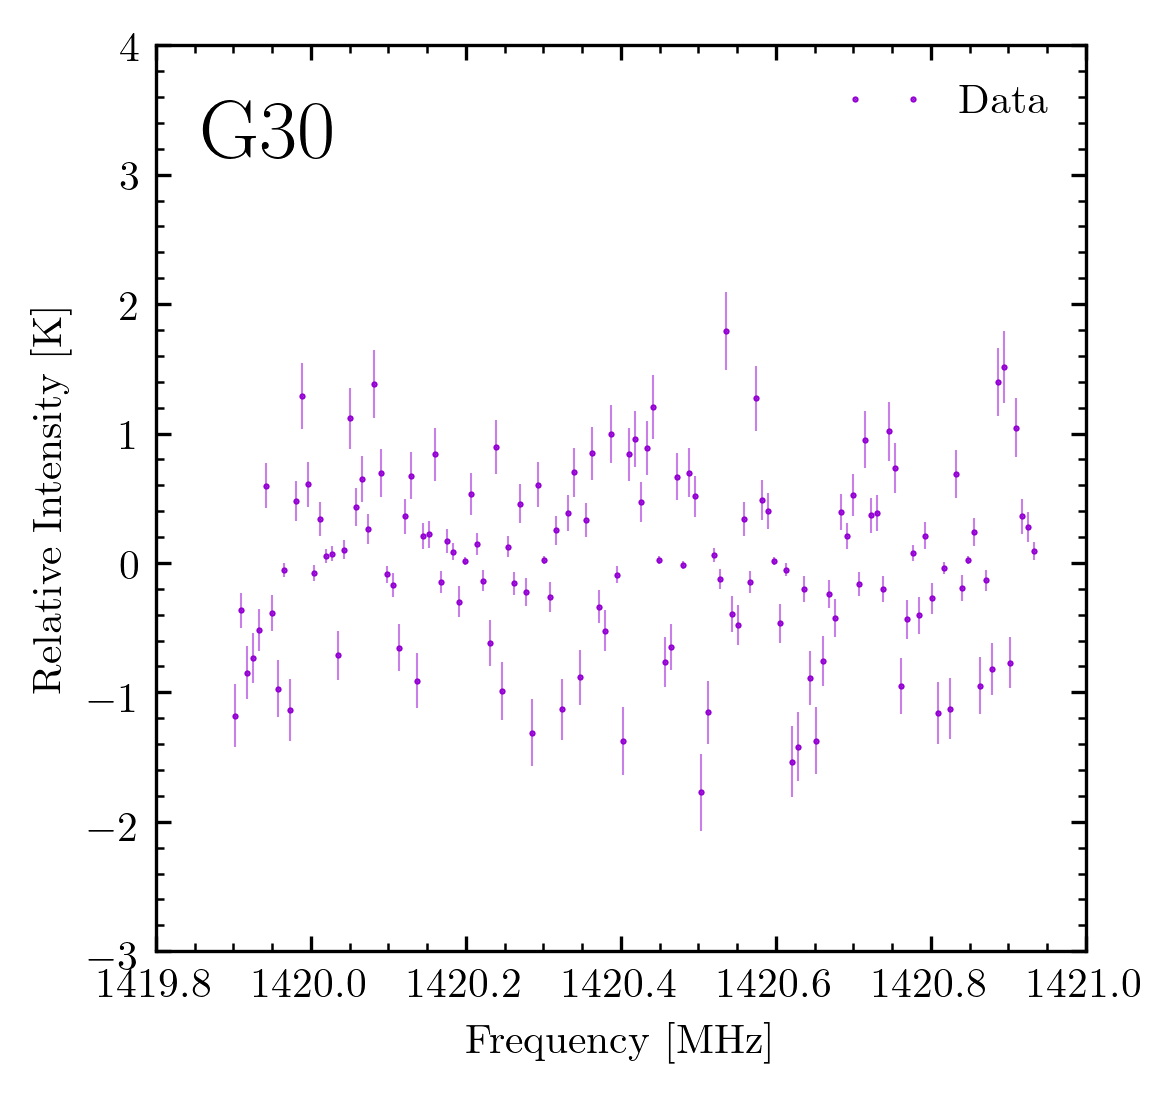

In [168]:
# G30
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-3,4), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins30_1, rel_spec30, yerr=errs_spec30, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins30_1, rel_spec30, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins30_1[0], bins30_1[-1], 100)
#ax.plot(x, gauss_func(x, *gopt30), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G30')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec30_gauss_fit.png')

In [ ]:
gopt35, gcov35 = gauss_fit(bins=bins35_1, freqs=rel_spec35, errs=errs_spec35, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

In [ ]:
# G35
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-3,4), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins35_1, rel_spec35, yerr=errs_spec35, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins35_1, rel_spec35, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins35_1[0], bins35_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt35), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G35')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec35_gauss_fit.png')

In [ ]:
gopt40, gcov40 = gauss_fit(bins=bins40_1, freqs=rel_spec40, errs=errs_spec40, 
                           a1=2, mu1=1420.5, sig1=0.1, a2=15, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

In [ ]:
# G40
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-15,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins40_1, rel_spec40, yerr=errs_spec40, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins40_1, rel_spec40, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins40_1[0], bins40_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt40), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G40')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec40_gauss_fit.png')

In [ ]:
gopt45, gcov45 = gauss_fit(bins=bins45_1, freqs=rel_spec45, errs=errs_spec45, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G45
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12.5,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins45_1, rel_spec45, yerr=errs_spec45, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins45_1, rel_spec45, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins45_1[0], bins45_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt45), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G45')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec45_gauss_fit.png')

In [ ]:
gopt50, gcov50 = gauss_fit(bins=bins50_1, freqs=rel_spec50, errs=errs_spec50, 
                           a1=5, mu1=1419.5, sig1=0.1, a2=6.5, mu2=1420.5, sig2=0.1, 
                           a3=5, mu3=1420.7, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-5)

In [ ]:
# G50
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12.5,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins50_1, rel_spec50, yerr=errs_spec50, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins50_1, rel_spec50, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins50_1[0], bins50_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt50), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G50')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec50_gauss_fit.png')

In [ ]:
gopt55, gcov55 = gauss_fit(bins=bins55_1, freqs=rel_spec55, errs=errs_spec55, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G55
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12.5,20), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins55_1, rel_spec55, yerr=errs_spec55, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins55_1, rel_spec55, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins55_1[0], bins55_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt55), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G55')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec55_gauss_fit.png')

In [ ]:
gopt60, gcov60 = gauss_fit(bins=bins60_1, freqs=rel_spec60, errs=errs_spec60, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G60
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,7.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins60_1, rel_spec60, yerr=errs_spec60, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins60_1, rel_spec60, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins60_1[0], bins60_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt60), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G60')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec60_gauss_fit.png')

In [ ]:
gopt65, gcov65 = gauss_fit(bins=bins65_1, freqs=rel_spec65, errs=errs_spec65, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G65
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,7.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins65_1, rel_spec65, yerr=errs_spec65, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins65_1, rel_spec65, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins65_1[0], bins65_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt65), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G65')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec65_gauss_fit.png')

In [ ]:
gopt70, gcov70 = gauss_fit(bins=bins70_1, freqs=rel_spec70, errs=errs_spec70, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=1.5, mu2=1420.1, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-2)

In [ ]:
# G70
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-2.5,8), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins70_1, rel_spec70, yerr=errs_spec70, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins70_1, rel_spec70, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins70_1[0], bins70_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt70), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G70')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec70_gauss_fit.png')

In [ ]:
gopt70

In [ ]:
gopt75, gcov75 = gauss_fit(bins=bins75_1, freqs=rel_spec75, errs=errs_spec75, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G75
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,8), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins75_1, rel_spec75, yerr=errs_spec75, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins75_1, rel_spec75, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins75_1[0], bins75_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt75), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G75')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec75_gauss_fit.png')

In [ ]:
gopt80, gcov80 = gauss_fit(bins=bins80_1, freqs=rel_spec80, errs=errs_spec80, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G80
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,8), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins80_1, rel_spec80, yerr=errs_spec80, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins80_1, rel_spec80, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins80_1[0], bins80_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt80), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G80')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec80_gauss_fit.png')

In [ ]:
gopt85, gcov85 = gauss_fit(bins=bins85_1, freqs=rel_spec85, errs=errs_spec85, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G85
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,8), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins85_1, rel_spec85, yerr=errs_spec85, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins85_1, rel_spec85, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins85_1[0], bins85_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt85), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G85')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec85_gauss_fit.png')

In [ ]:
gopt90, gcov90 = gauss_fit(bins=bins90_1, freqs=rel_spec90, errs=errs_spec90, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=10, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

In [ ]:
# G90
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-5,8), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins90_1, rel_spec90, yerr=errs_spec90, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins90_1, rel_spec90, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins90_1[0], bins90_1[-1], 100)
ax.plot(x, gauss_func(x, *gopt90), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
#ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G90')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\spec90_gauss_fit.png')

Get the Maximally Red-Shifted Frequency from Each Scan

In [ ]:
# get the fit mean parameters from each gaussian in each longitude
means0 = gopt0[1:][::3]
means5 = gopt5[1:][::3]
means10 = gopt10[1:][::3]
means15 = gopt15[1:][::3]
means20 = gopt20[1:][::3]
means25 = gopt25[1:][::3]
means30 = gopt30[1:][::3]
means35 = gopt35[1:][::3]
means40 = gopt40[1:][::3]
means45 = gopt45[1:][::3]
means50 = gopt50[1:][::3]
means55 = gopt55[1:][::3]
means60 = gopt60[1:][::3]
means65 = gopt65[1:][::3]
means70 = gopt70[1:][::3]
means75 = gopt75[1:][::3]
means80 = gopt80[1:][::3]
means85 = gopt85[1:][::3]
means90 = gopt90[1:][::3]

In [ ]:
# for now, take the gaussian with smallest mean (fit frequency) to be the max red shifted freq
fred0 = min(means0)
uncert0 = np.sqrt(np.diag(gcov0)[gopt0==fred0])

fred5 = min(means5)
uncert5 = np.sqrt(np.diag(gcov5)[gopt5==fred5])

fred10 = min(means10)
uncert10 = np.sqrt(np.diag(gcov20)[gopt10==fred10])

fred15 = min(means15)
uncert15 = np.sqrt(np.diag(gcov15)[gopt15==fred15])

fred20 = min(means20)
uncert20 = np.sqrt(np.diag(gcov20)[gopt20==fred20])

fred25 = min(means25)
uncert25 = np.sqrt(np.diag(gcov25)[gopt25==fred25])

fred30 = min(means30)
uncert30 = np.sqrt(np.diag(gcov30)[gopt30==fred30])

fred35 = min(means35)
uncert35 = np.sqrt(np.diag(gcov35)[gopt35==fred35])

fred40 = min(means40)
uncert40 = np.sqrt(np.diag(gcov40)[gopt40==fred40])

fred45 = min(means45)
uncert45 = np.sqrt(np.diag(gcov45)[gopt45==fred45])

fred50 = min(means50)
uncert50 = np.sqrt(np.diag(gcov50)[gopt50==fred50])

fred55 = min(means55)
uncert55 = np.sqrt(np.diag(gcov55)[gopt55==fred55])

fred60 = min(means60)
uncert60 = np.sqrt(np.diag(gcov60)[gopt60==fred60])

fred65 = min(means65)
uncert65 = np.sqrt(np.diag(gcov65)[gopt65==fred65])

fred70 = min(means70)
uncert70 = np.sqrt(np.diag(gcov70)[gopt70==fred70])

fred75 = min(means75)
uncert75 = np.sqrt(np.diag(gcov75)[gopt75==fred75])

fred80 = min(means80)
uncert80 = np.sqrt(np.diag(gcov80)[gopt80==fred80])

fred85 = min(means85)
uncert85 = np.sqrt(np.diag(gcov85)[gopt85==fred85])

fred90 = min(means90)
uncert90 = np.sqrt(np.diag(gcov90)[gopt90==fred90])

In [ ]:
# collect the max shifted frequencies and errors in 2 separate lists
freds = [fred0, fred5, fred10, fred15, fred20, fred25, fred30, fred35, fred40, fred45, 
         fred50, fred55, fred60, fred65, fred70, fred75, fred80, fred85, fred90]

frederrs = [uncert0[0], uncert5[0], uncert10[0], uncert15[0], uncert20[0], uncert25[0], 
            uncert30[0], uncert35[0], uncert40[0], uncert45[0], uncert50[0], uncert55[0], 
            uncert60[0], uncert65[0], uncert70[0], uncert75[0], uncert80[0], uncert85[0], 
            uncert90[0]]

**Derive the Velocity Curve of the Milky Way**

Create Functions for Relevant Quantities

$r = R_{\odot}\sin(\frac{\alpha\pi}{180})$

In [ ]:
# radius (in kiloparsecs)
def radius(longitudes):
    # distance from solar system to galactic center  (kiloparsecs)
    R0 = 8.5
    
    # uncertainty
    dR0 = 0.5
    
    rad = R0*np.sin(np.array(longitudes)*np.pi/180)
    return rad, rad*dR0/R0

$v_{\mathrm{max}}=c\frac{f_{0}-f_{\mathrm{red}}}{f_{0}}-v_{\mathrm{LSR}}$

In [ ]:
# maximum radial velocity along our line of site
def vmax(freqs, funcerts, vlsrs):
    # speed of light (in km/s)
    c = 299792.458
    
    # 21cm line frequency (MHz)
    f0 = 1420.4
    
    # doppler effect
    dop = (f0-np.array(freqs))/f0
    
    shift = c*dop-vlsrs
    dshift = shift*np.array(funcerts)/np.array(freqs)
    return shift, dshift 

$v(r)=v_{\mathrm{max}} + v_{\odot}\sin(\frac{\alpha\pi}{180})$

In [ ]:
# galactic velocity
def gal_vel(vmaxes, vmaxerrs, longitudes):
    
    # rotational velocity of the solar system
    v0 = 220 #km/sec
    
    # uncertainty in solar system rot velocity
    dv0 = 20
    
    # galactic coordinate angles
    angs = np.sin(np.array(longitudes)*np.pi/180)
    
    
    vels = np.array(vmaxes) + v0*angs
    dvels = vels*(np.array(vmaxerrs)/np.array(vmaxes) + dv0/v0)
    
    return vels, dvels

Calculate the Galactic Velocities

In [ ]:
# get the radii (will be the x axis of velocity curve, in kpc)
radii, raduncerts = radius(longs)

In [ ]:
radii, raduncerts

In [ ]:
# get the vmaxes
vmaxes, vmaxerrs = vmax(freds, frederrs, vlsrs1)

In [ ]:
vmaxes, vmaxerrs

In [ ]:
# get the galactic velocities
vels, velerrs = gal_vel(vmaxes, vmaxerrs, longs)

In [ ]:
vels, velerrs

In [ ]:
# plot the velocity curve
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-1,12), ylim=(100,500), 
                         xlabel='Distance from Galactic Center [kpc]', 
                         ylabel='Circular Velocity [km/sec]')

ax.errorbar(radii, vels, xerr=raduncerts, yerr=velerrs, capthick=1, capsize=1, elinewidth=0.5, 
            color='blue', marker='.', ms=0.5, ls='none', label='Data')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = False
if save:
    plt.savefig(dir_plot + '\\raw_rot_curve.png')

Fit the Data above 6kpc to both the keplerian and linear dark matter model

In [ ]:
## Note: The bulge has a radius of about 6 kilo parsecs

In [ ]:
def keplerian_func(r, g, m):
    return np.sqrt(g*m*np.ones(shape=np.array(r).shape)/np.array(r))

In [ ]:
# kep fit function
def kep_fit(r, v, errs, g, m):
    popt, pcov = curve_fit(keplerian_func, r, v, sigma=errs, p0 = [g, m],
                       absolute_sigma = True)
    return popt, pcov

In [ ]:
def darkmatter(r, a, b):
    return a*r+b

In [ ]:
# dark fit function
def dark_fit(r, v, errs, a, b):
    popt, pcov = curve_fit(darkmatter, r, v, sigma=errs, p0 = [a, b],
                       absolute_sigma = True)
    return popt, pcov

In [ ]:
popt_kep, pcov_kep = kep_fit(radii[9:], vels[9:], velerrs[9:], 4.3*10**-6, 2*10)

In [ ]:
popt_kep

In [ ]:
popt_dark, pcov_dark = dark_fit(radii[9:], vels[9:], velerrs[9:], 250.0, 12.0)

In [ ]:
popt_dark

Get the Chi Squared Statistic For Each Fit

In [ ]:
chi_kep = chisq(keplerian_func, popt_kep, radii[9:], vels[9:], velerrs[9:])
chi_dark = chisq(darkmatter, popt_dark, radii[9:], vels[9:], velerrs[9:])

In [ ]:
chi_kep

In [ ]:
chi_dark

Plot the Data with the Fit Models

In [ ]:
# plot the velocity curve
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-1,12), ylim=(60,445), 
                         xlabel='Distance from Galactic Center [kpc]', 
                         ylabel='Circular Velocity [km/sec]')

# observed data
ax.errorbar(radii, vels, xerr=raduncerts, yerr=velerrs, capthick=1, capsize=1, elinewidth=0.5, 
            color='blue', marker='.', ms=0.5, ls='none', label='Observed')

x = np.linspace(5, 11.5, 100)
# fit models
ax.plot(x, keplerian_func(x, *popt_kep), ls='-', lw='0.5',
        color='red', label='Keplerian Model')
ax.plot(x, darkmatter(x, *popt_dark), ls='--', lw='0.5', 
        color='purple', label='Dark Matter Model')

# milky way bulge
ax.axvline(6, ymin=0, ymax=0.5, color='gray', ls=':', label='Milky Way Bulge')

modplot.stamp(ax=ax, left_x=0.60, top_y=0.20, textops_update={'fontsize':12},
             line_0 = r'$\chi^{2}_{kep}=2.056$',
             line_1 = r'$\chi^{2}_{dark}=0.749$')

ax.legend(loc='upper left', numpoints=2, frameon=False)

save = False
if save: 
    plt.savefig(dir_plot + '\\rot_curve_fit.png')